# Project- Glass Identification Dataset

# Outline:

-Best Random State ,Find Best accuracy/testing accuracy

In [ ]:
.Find best model

.Hyper parameter tunning:

.GridSearchCV

.Saving the model:

# Attribute Information:
    
1.Id number: 1 to 214

2.RI: refractive index

3.Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.Mg: Magnesium
    
5.Al: Aluminum

6.Si: Silicon

7.K: Potassium

8.Ca: Calcium

9.Ba: Barium

10.Fe: Iron

    Type of glass: (class attribute)

1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps

# Problem Statement:
Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. 
BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 
827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were 
    
    obtained (# incorrect answers):

Type of Sample -- Beagle -- NN -- DA
Windows that were float processed (87) -- 10 -- 12 -- 21
Windows that were not: (76) -- 19 -- 16 -- 22

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the 
        glass left can be used as evidence...if it is correctly identified!

In [ ]:
Kaggle URL to Download Dataset:
-https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
-https://github.com/dsrscientist/dataset3

In [230]:
#import libraries
import numpy as np #for arrays
import pandas  as pd #for dataframes(rows,cols)
import matplotlib.pyplot as plt # for plotting
%matplotlib inline 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder #to convert categorical value in to numerical values
from sklearn.model_selection import train_test_split # to split data into train and test
import warnings
warnings.filterwarnings('ignore')

In [231]:
#Read the dataset:
df=pd.read_csv('Glass.csv')
df

1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]

# Exploring Dataset
1.Shape of dataset
2.Count of Null values
3.checking information
4.Statisitics of dataset
5.data dtypes
6.Checking sample
7.Transform the dataset

# Understanding attributes:

In [232]:
 #checking  the shape of dataframe:
df.shape

(213, 11)

In [233]:
#Let's Get The Detail Data Info To Understand Each Independent Attribute, it's data type and its meaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [234]:
#display sample(5)
df.sample(5)

1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
91    93  1.51588  13.12  3.41  1.58  73.26  0.07  8.39  0.00    0.19    2
50    52  1.51926  13.20  3.33  1.28  72.36  0.60  9.14  0.00    0.11    1
141  143  1.51662  12.85  3.51  1.44  73.01  0.68  8.23  0.06    0.25    2
185  187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63    0.00    7
194  196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61    0.05    7

In [235]:
#cheking datatype
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [236]:
#check null values in the dataframe: 
df.isnull()

1  1.52101  13.64   4.49   1.10  71.78   0.06   8.75   0.00  0.00.1  \
0    False    False  False  False  False  False  False  False  False   False   
1    False    False  False  False  False  False  False  False  False   False   
2    False    False  False  False  False  False  False  False  False   False   
3    False    False  False  False  False  False  False  False  False   False   
4    False    False  False  False  False  False  False  False  False   False   
..     ...      ...    ...    ...    ...    ...    ...    ...    ...     ...   
208  False    False  False  False  False  False  False  False  False   False   
209  False    False  False  False  False  False  False  False  False   False   
210  False    False  False  False  False  False  False  False  False   False   
211  False    False  False  False  False  False  False  False  False   False   
212  False    False  False  False  False  False  False  False  False   False   

       1.1  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
208  False  
209  False  
210  False  
211  False  
212  False  

[213 rows x 11 columns]

In [237]:
#checking null values:
df.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [238]:
#Statistical summary:
df.describe()

1     1.52101       13.64        4.49        1.10       71.78  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

             0.06        8.75        0.00      0.00.1         1.1  
count  213.000000  213.000000  213.000000  213.000000  213.000000  
mean     0.499108    8.957934    0.175869    0.057277    2.788732  
std      0.653035    1.426435    0.498245    0.097589    2.105130  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.130000    8.240000    0.000000    0.000000    1.000000  
50%      0.560000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.180000    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [239]:
#Transpose R into C :
df.describe().T

count        mean        std       min       25%        50%  \
1        213.0  108.000000  61.631972   2.00000  55.00000  108.00000   
1.52101  213.0    1.518353   0.003039   1.51115   1.51652    1.51768   
13.64    213.0   13.406761   0.818371  10.73000  12.90000   13.30000   
4.49     213.0    2.676056   1.440453   0.00000   2.09000    3.48000   
1.10     213.0    1.446526   0.499882   0.29000   1.19000    1.36000   
71.78    213.0   72.655023   0.774052  69.81000  72.28000   72.79000   
0.06     213.0    0.499108   0.653035   0.00000   0.13000    0.56000   
8.75     213.0    8.957934   1.426435   5.43000   8.24000    8.60000   
0.00     213.0    0.175869   0.498245   0.00000   0.00000    0.00000   
0.00.1   213.0    0.057277   0.097589   0.00000   0.00000    0.00000   
1.1      213.0    2.788732   2.105130   1.00000   1.00000    2.00000   

               75%        max  
1        161.00000  214.00000  
1.52101    1.51915    1.53393  
13.64     13.83000   17.38000  
4.49       3.60000    3.98000  
1.10       1.63000    3.50000  
71.78     73.09000   75.41000  
0.06       0.61000    6.21000  
8.75       9.18000   16.19000  
0.00       0.00000    3.15000  
0.00.1     0.10000    0.51000  
1.1        3.00000    7.00000

# Preparing Dataset
Adding meaningful column/attribute names

In [240]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  glass_type
0   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00           1
1   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00           1
2   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00           1
3   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00           1
4   6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26           1

In [241]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names

df.describe()

Id          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

                K          Ca          Ba          Fe  glass_type  
count  213.000000  213.000000  213.000000  213.000000  213.000000  
mean     0.499108    8.957934    0.175869    0.057277    2.788732  
std      0.653035    1.426435    0.498245    0.097589    2.105130  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.130000    8.240000    0.000000    0.000000    1.000000  
50%      0.560000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.180000    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

# We will divide the 7 categories of label class in to two categories of 1 and 2

In [242]:
glass_type = []
for i in df['glass_type']:
    if i >= 1 and i <= 4:
        glass_type.append('1')
    elif i >= 5 and i <= 7:
        glass_type.append('2')

df['glass_type'] = glass_type

set(glass_type)

{'1', '2'}

In [243]:
#Processing the Data
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

In [244]:
y['glass_type'].unique()

array(['1', '2'], dtype=object)

# Removing unnecessary columns

In [245]:
df = df.drop('Id',1)

In [246]:
#checking  upper rows:

In [247]:
df.head(3)

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe glass_type
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1

# Skewness:

In [265]:
#checking skewness
X.skew().sort_values(ascending=False)

Ba    3.178256
Fe    1.478611
Ca    1.074092
RI    0.971729
Al    0.649917
Na    0.375857
K     0.297900
Si   -0.436288
Mg   -1.533664
dtype: float64

In [266]:
#importing power transformer:
from sklearn.preprocessing import PowerTransformer

In [269]:
#fitting power transformer:
pt=PowerTransformer()
X_new_pt=pt.fit_transform(X)
X_new_pt

array([[ 0.        ,  0.73316709,  0.60667922, ..., -1.05441979,
        -0.4307453 , -0.68013097],
       [ 0.        ,  0.21611332,  0.52479792, ..., -1.11687859,
        -0.4307453 , -0.68013097],
       [ 0.        , -0.26554878,  0.75848445, ..., -0.58616808,
        -0.4307453 , -0.68013097],
       ...,
       [ 0.        ,  2.08299719, -1.9502708 , ..., -0.38071374,
         2.49256097, -0.68013097],
       [ 0.        ,  1.3716302 , -1.9502708 , ..., -0.33591994,
         2.49257769, -0.68013097],
       [ 0.        ,  1.39793079, -1.9502708 , ..., -0.29143235,
         2.49255313, -0.68013097]])

In [274]:
#CHECKING SKEWNESS:
pd.DataFrame(X_new_pt,columns=X.columns).skew().sort_values(ascending=False)

Ba    1.963711
Fe    0.852040
Si    0.038832
K     0.016658
Al    0.014781
RI    0.000000
Na   -0.017389
Ca   -0.081151
Mg   -1.082875
dtype: float64

In [278]:
#covert the transform value into the dataset ,we will get the values in the form of x:
X=df
X=X_new_pt

In [279]:
#Now validating that skewness has been removed or not:
x.skew().sort_values(ascending=False)
sk=x.skew()
sk

RI            1.639658
Na            0.457318
Mg           -1.154323
Al            0.900017
Si           -0.744546
K             6.549276
Ca            2.040591
Ba            3.406749
Fe            1.747173
glass_type    1.229860
dtype: float64

# Checking outlies through Z-score

In [284]:
from scipy import stats

z = abs(stats.zscore(df))

#np.where(z > 3)

df = df[(z < 3).all(axis=1)]

#data.shape

In [ ]:
# covert negative into positive:

In [282]:
sk[np.abs(sk)<0.23]

Series([], dtype: float64)

In [ ]:
#for checking all/Covert all together:

In [287]:
sk[np.abs(sk)<0.23].all()

True

# Label Encoding:

In [249]:
from sklearn.preprocessing import LabelEncoder 
# Fit the  transform:
LE=LabelEncoder()
df["glass_type"]=LE.fit_transform(df["glass_type"])

In [250]:
df.glass_type.value_counts()

0    162
1     51
Name: glass_type, dtype: int64

In [ ]:
#outliers:

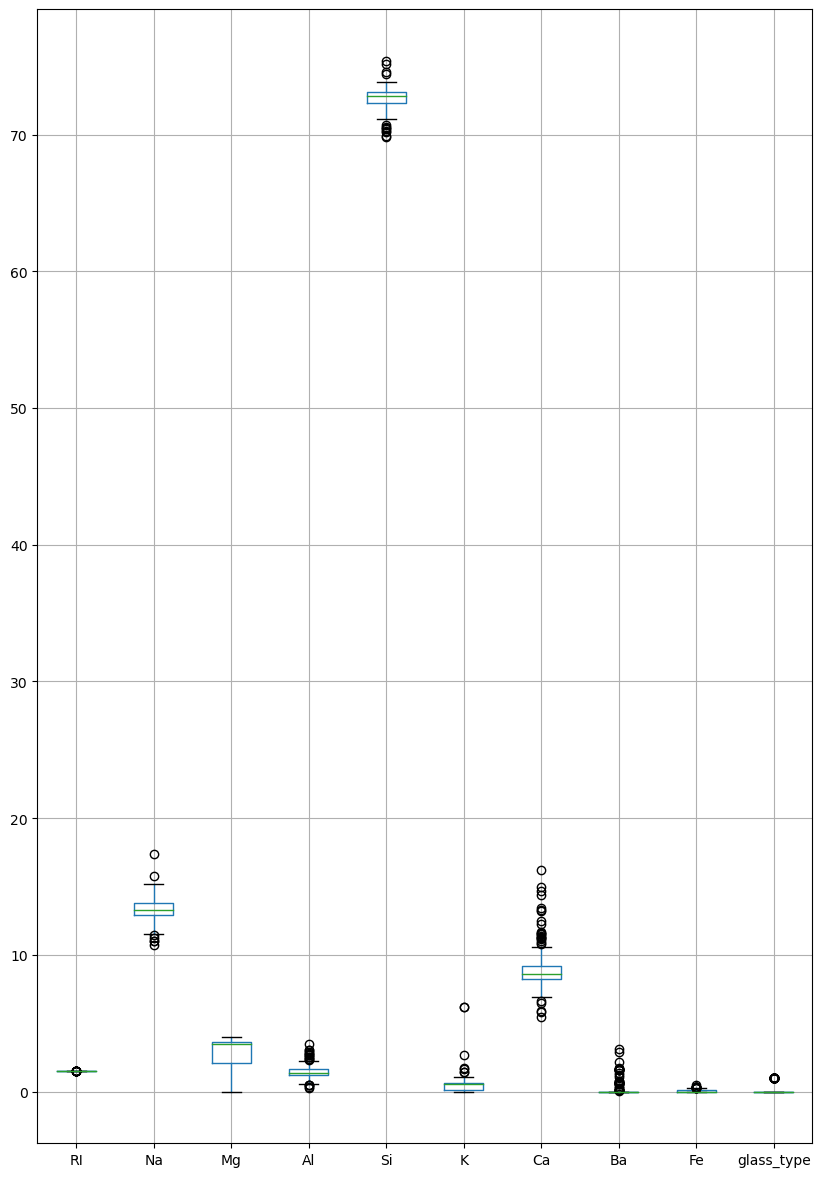

In [432]:
#Checking outliers
x.iloc[:,0:20].boxplot(figsize=[10,18])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
 As we can  see there  are  outliers in  each feature:

In [297]:
#Let's Quantifly:
from scipy.stats import zscore
(np.abs(zscore(x))).all().all()

True

In [298]:
(np.abs(zscore(X))<3).all().all()

False

# Separating Features and Label

In [301]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = data[features]

y = data[label]

In [302]:
X.shape

(193, 9)

In [303]:
type(X)

pandas.core.frame.DataFrame

# Data Visualization

# Univariate Analysis:

In [373]:
glass_type=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

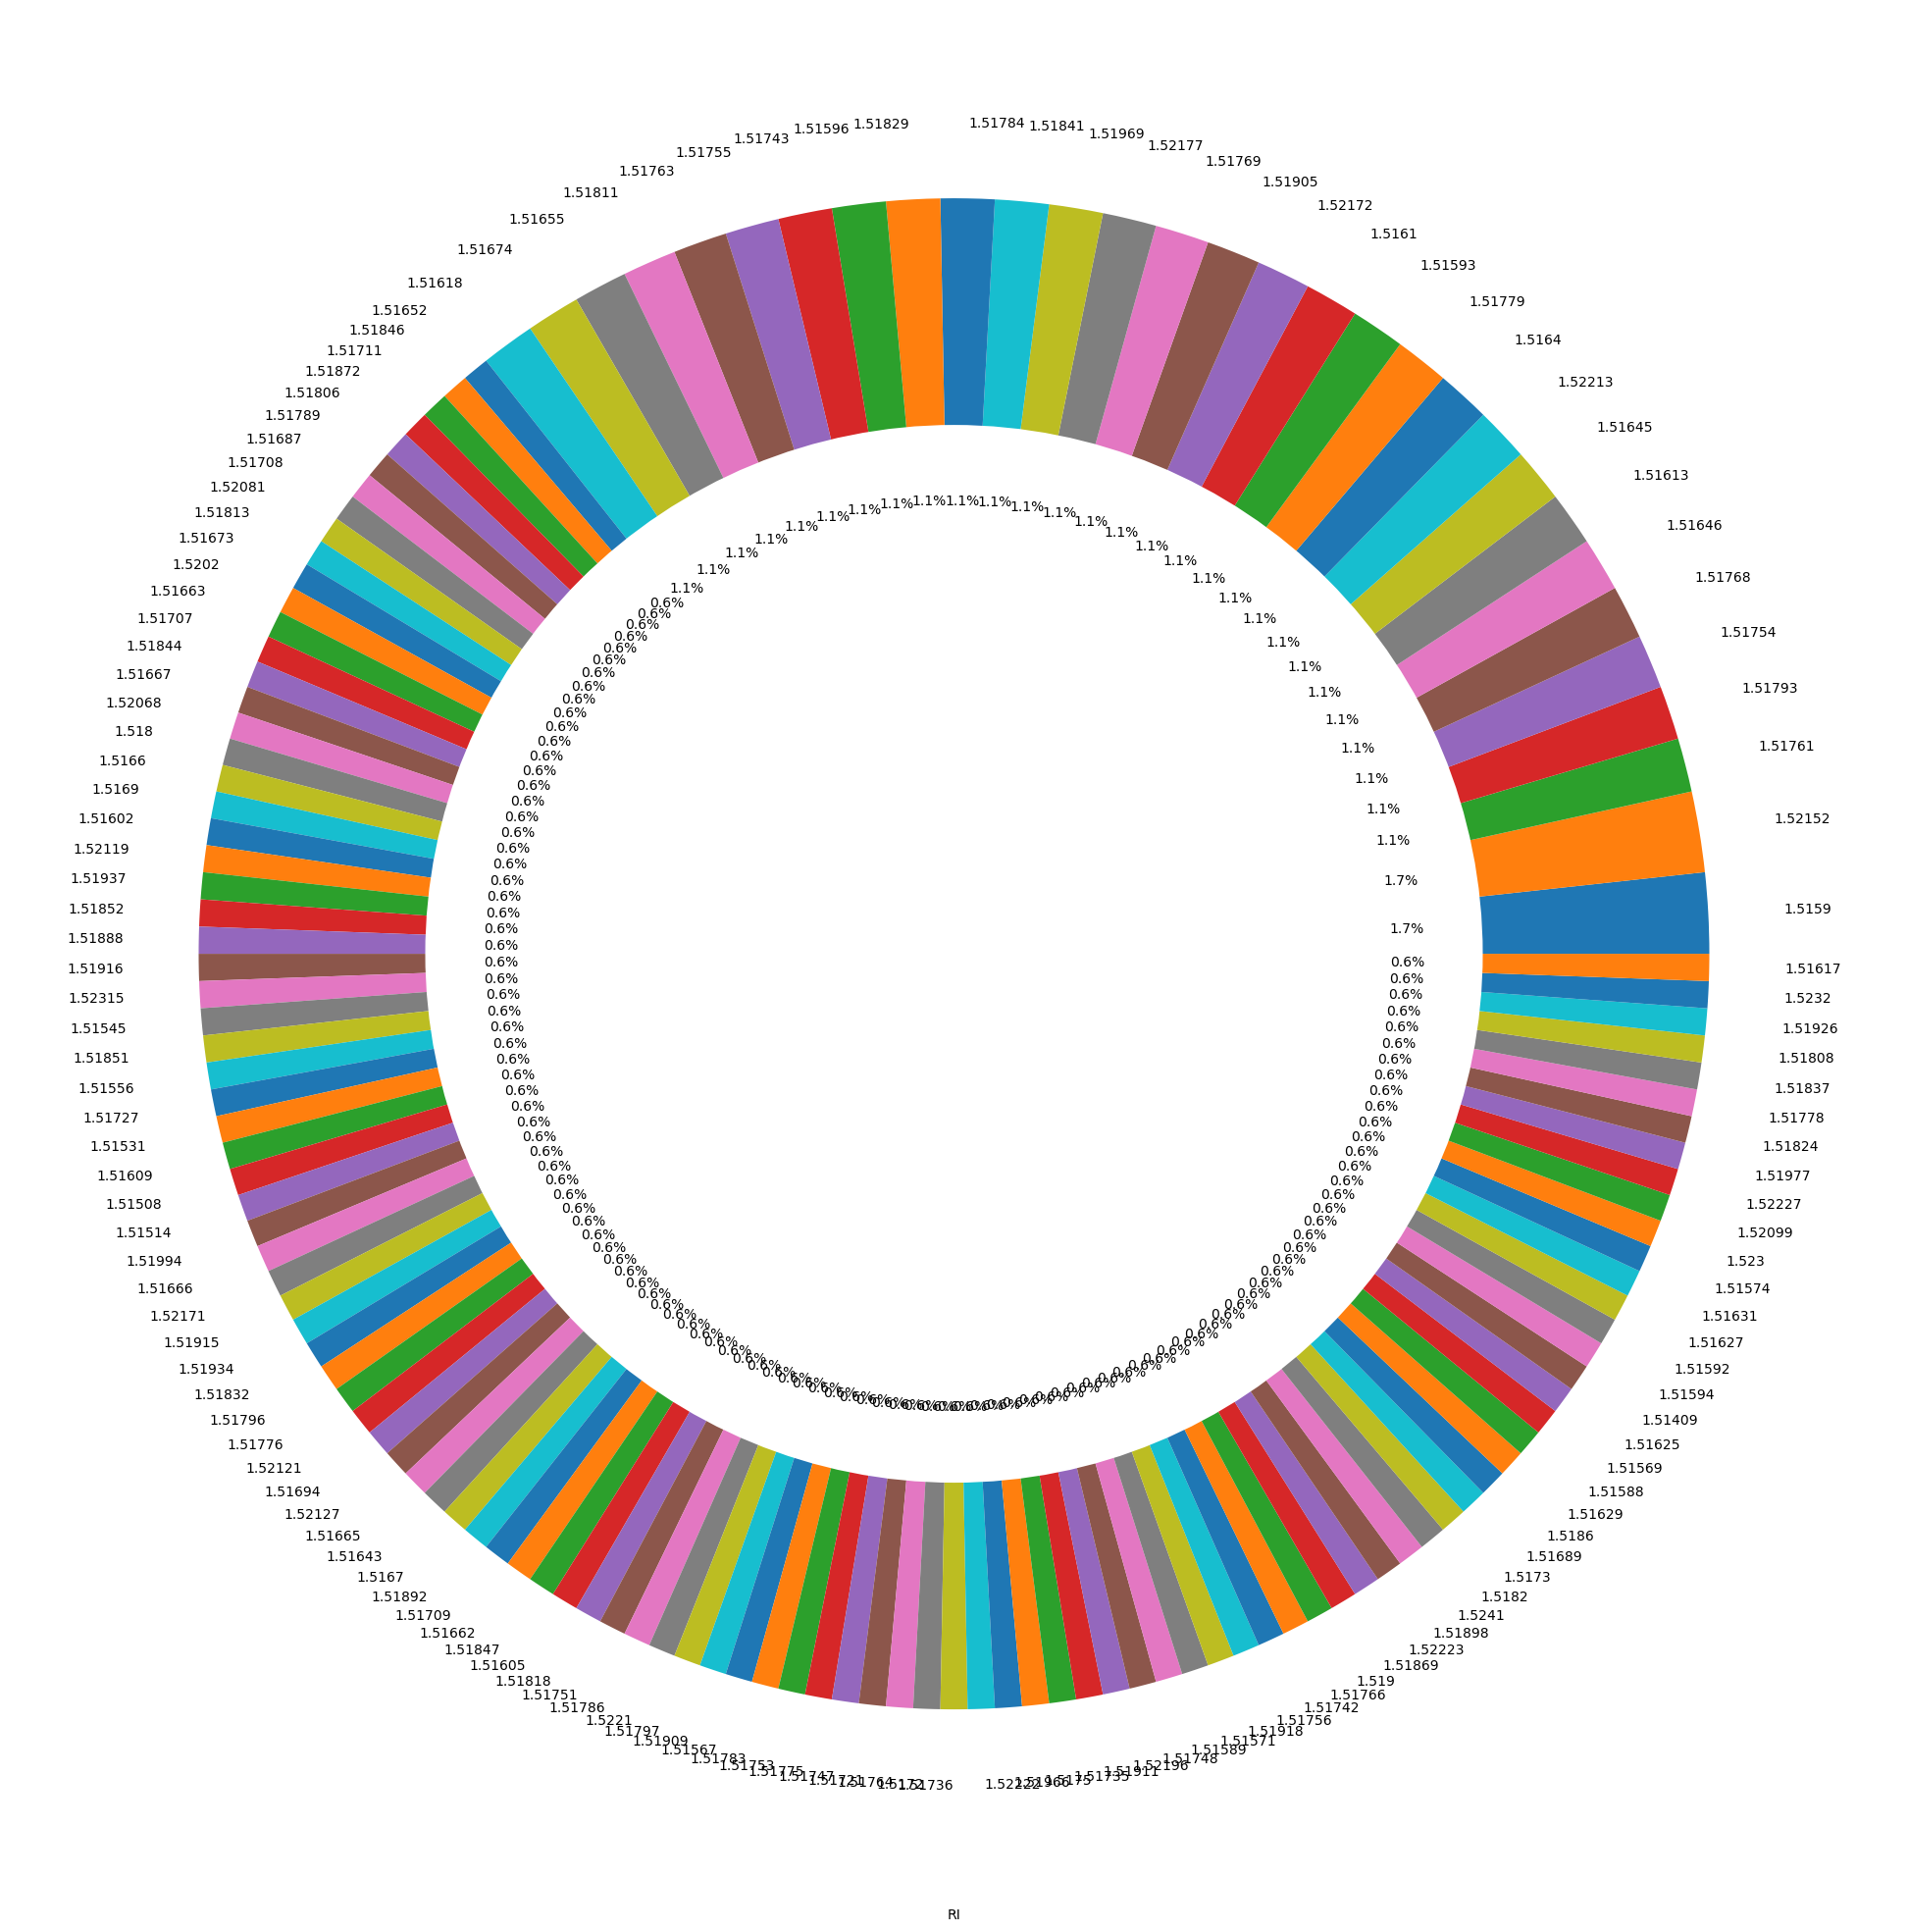

<Figure size 640x480 with 0 Axes>

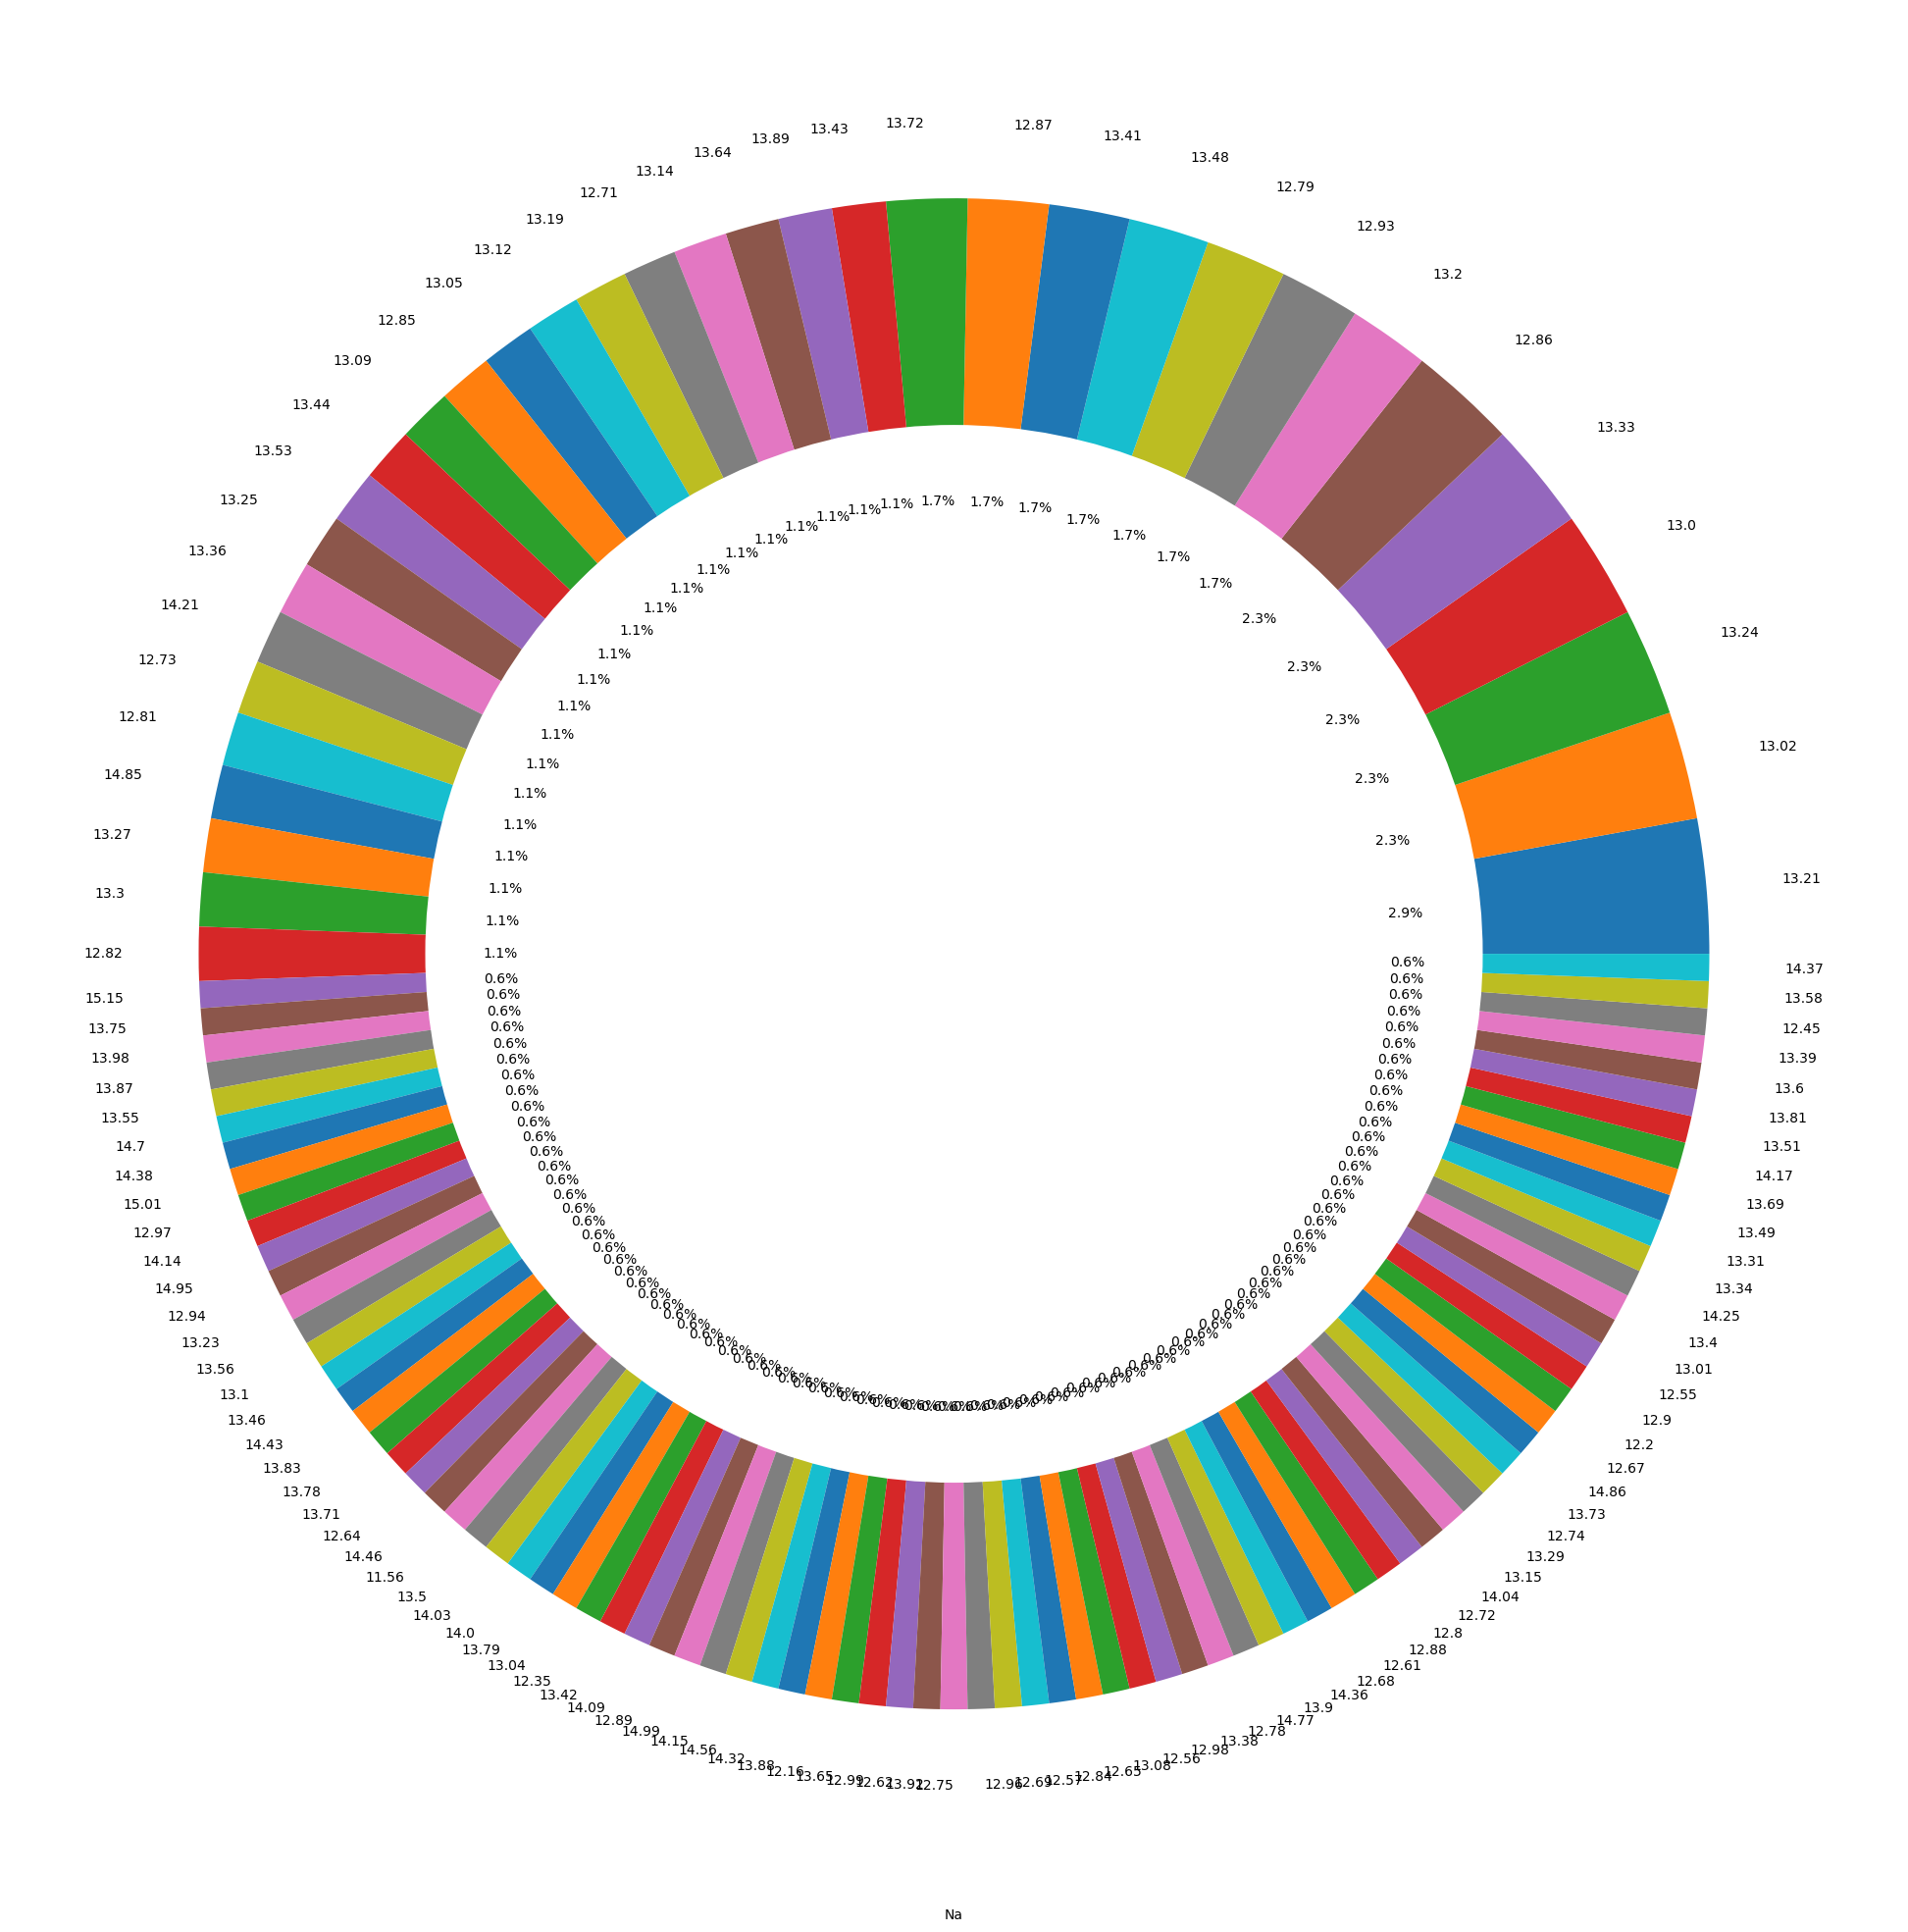

<Figure size 640x480 with 0 Axes>

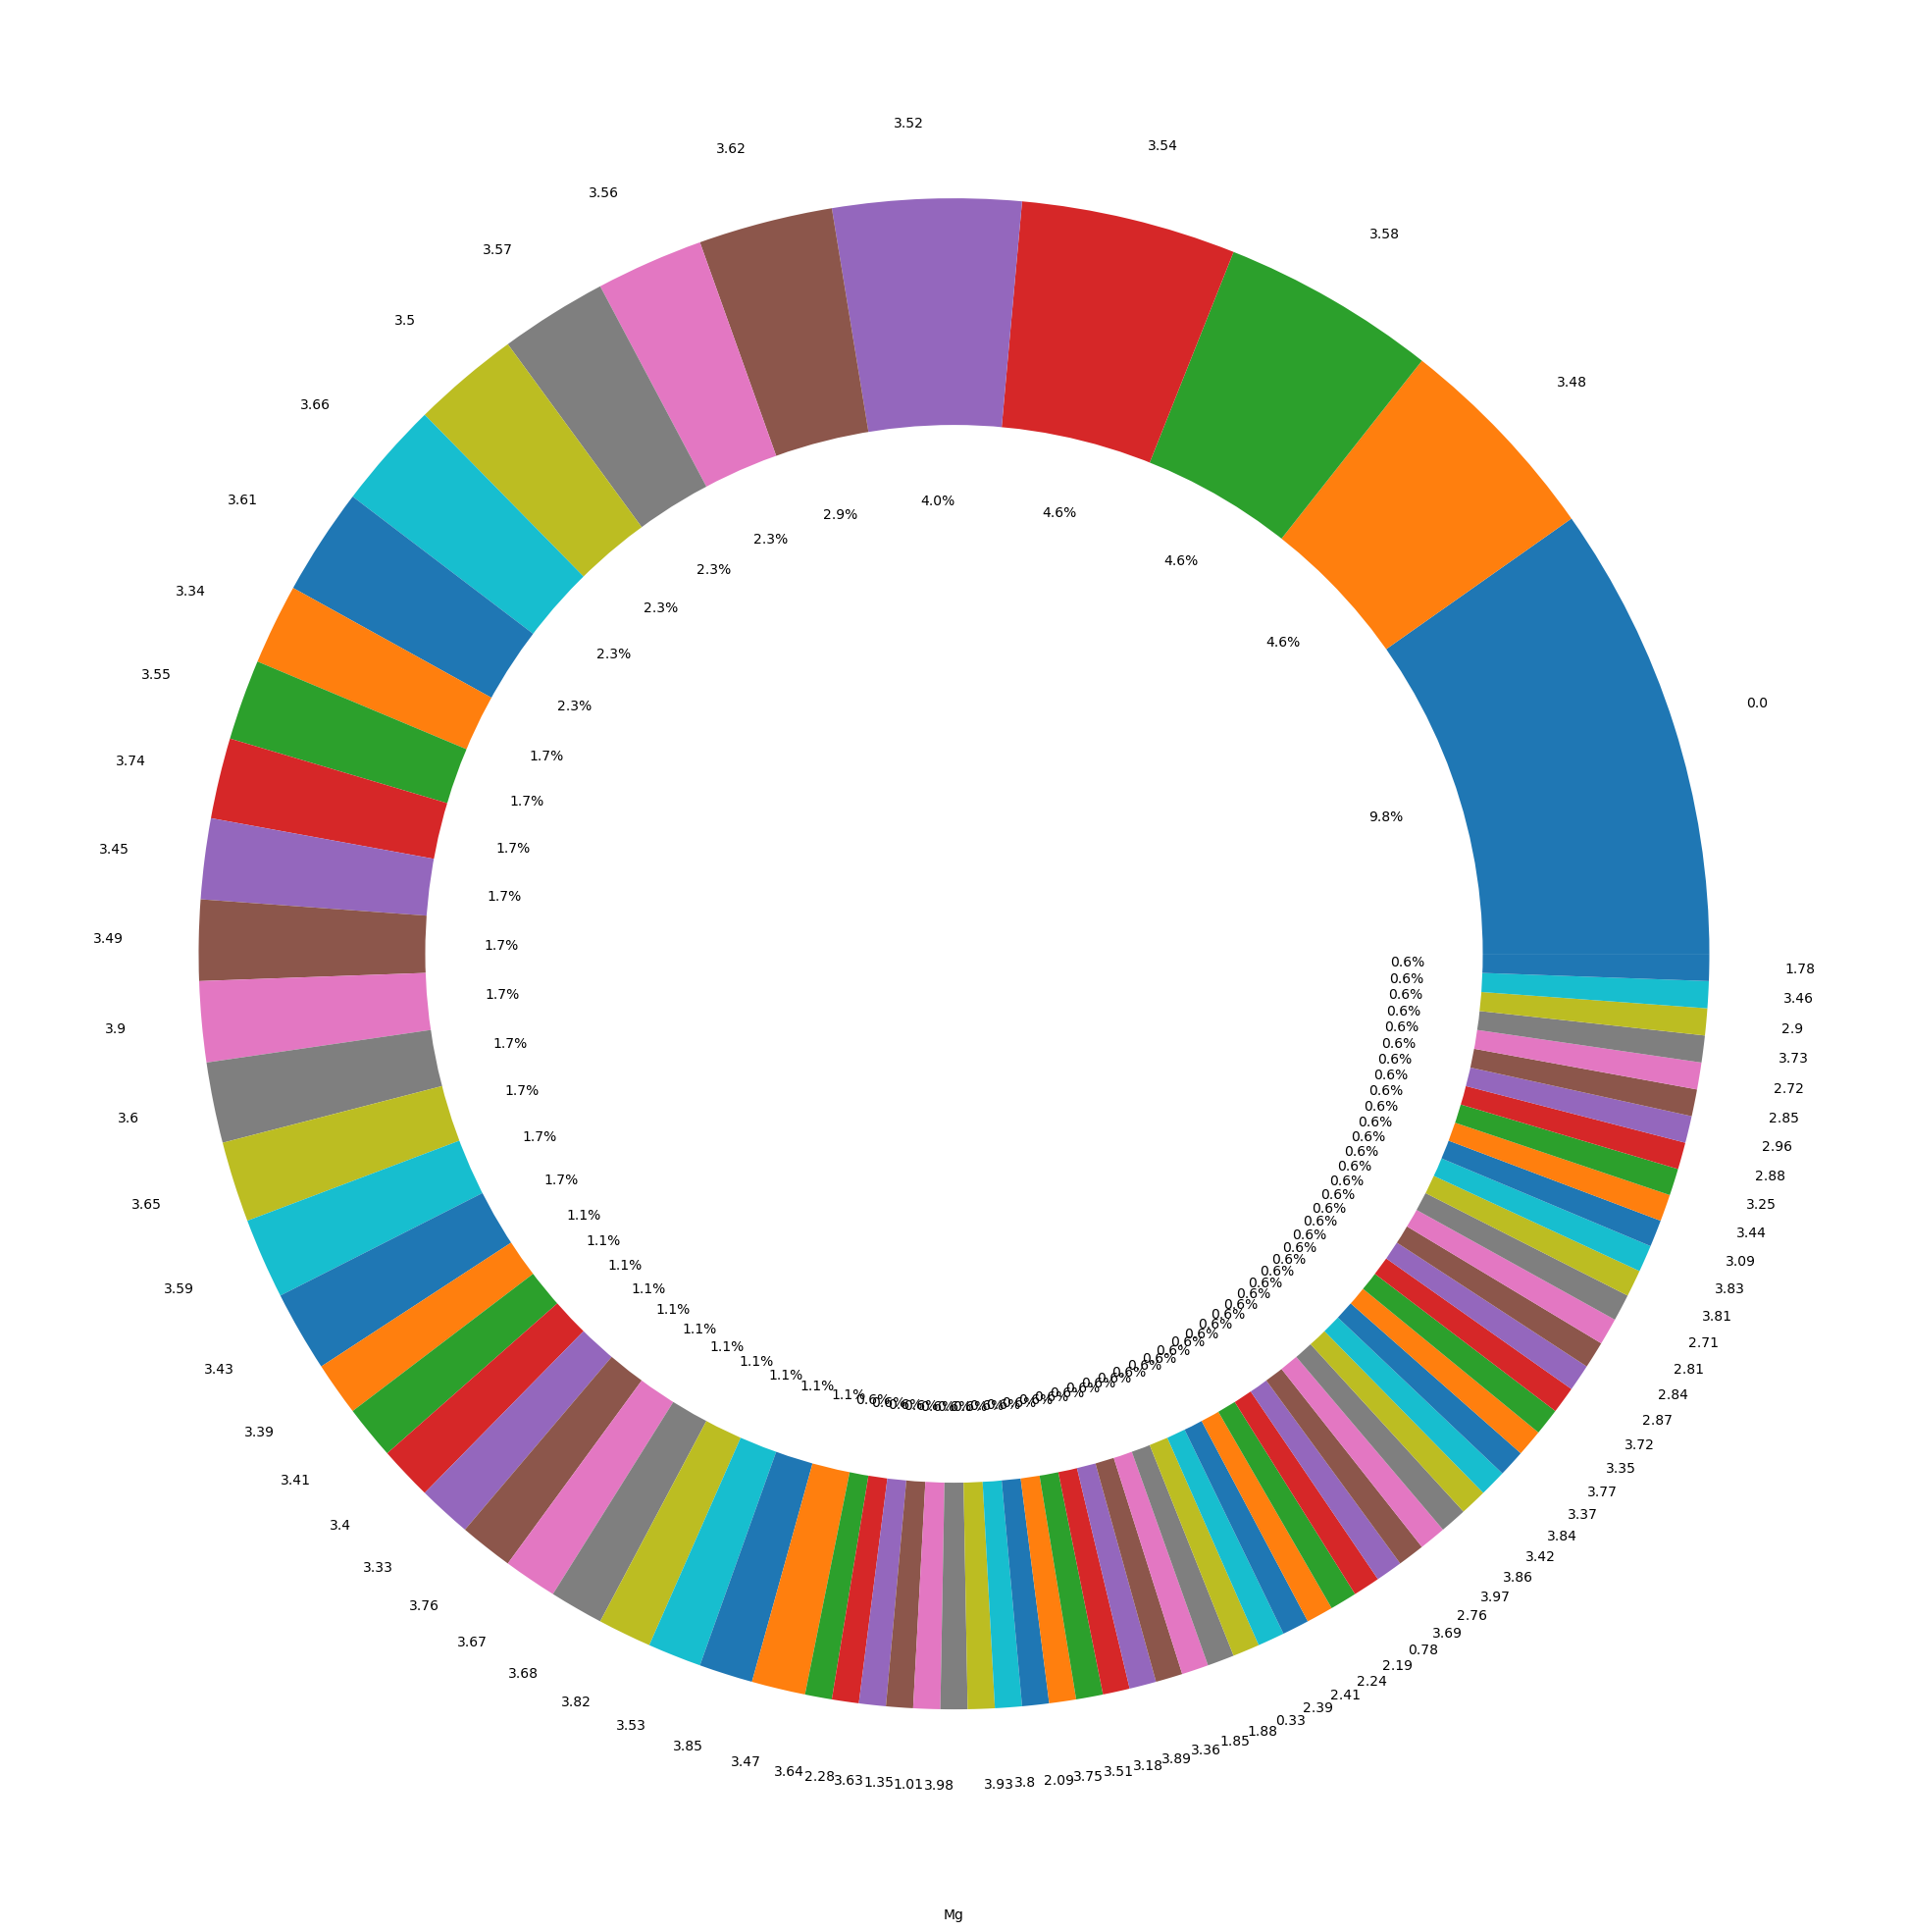

<Figure size 640x480 with 0 Axes>

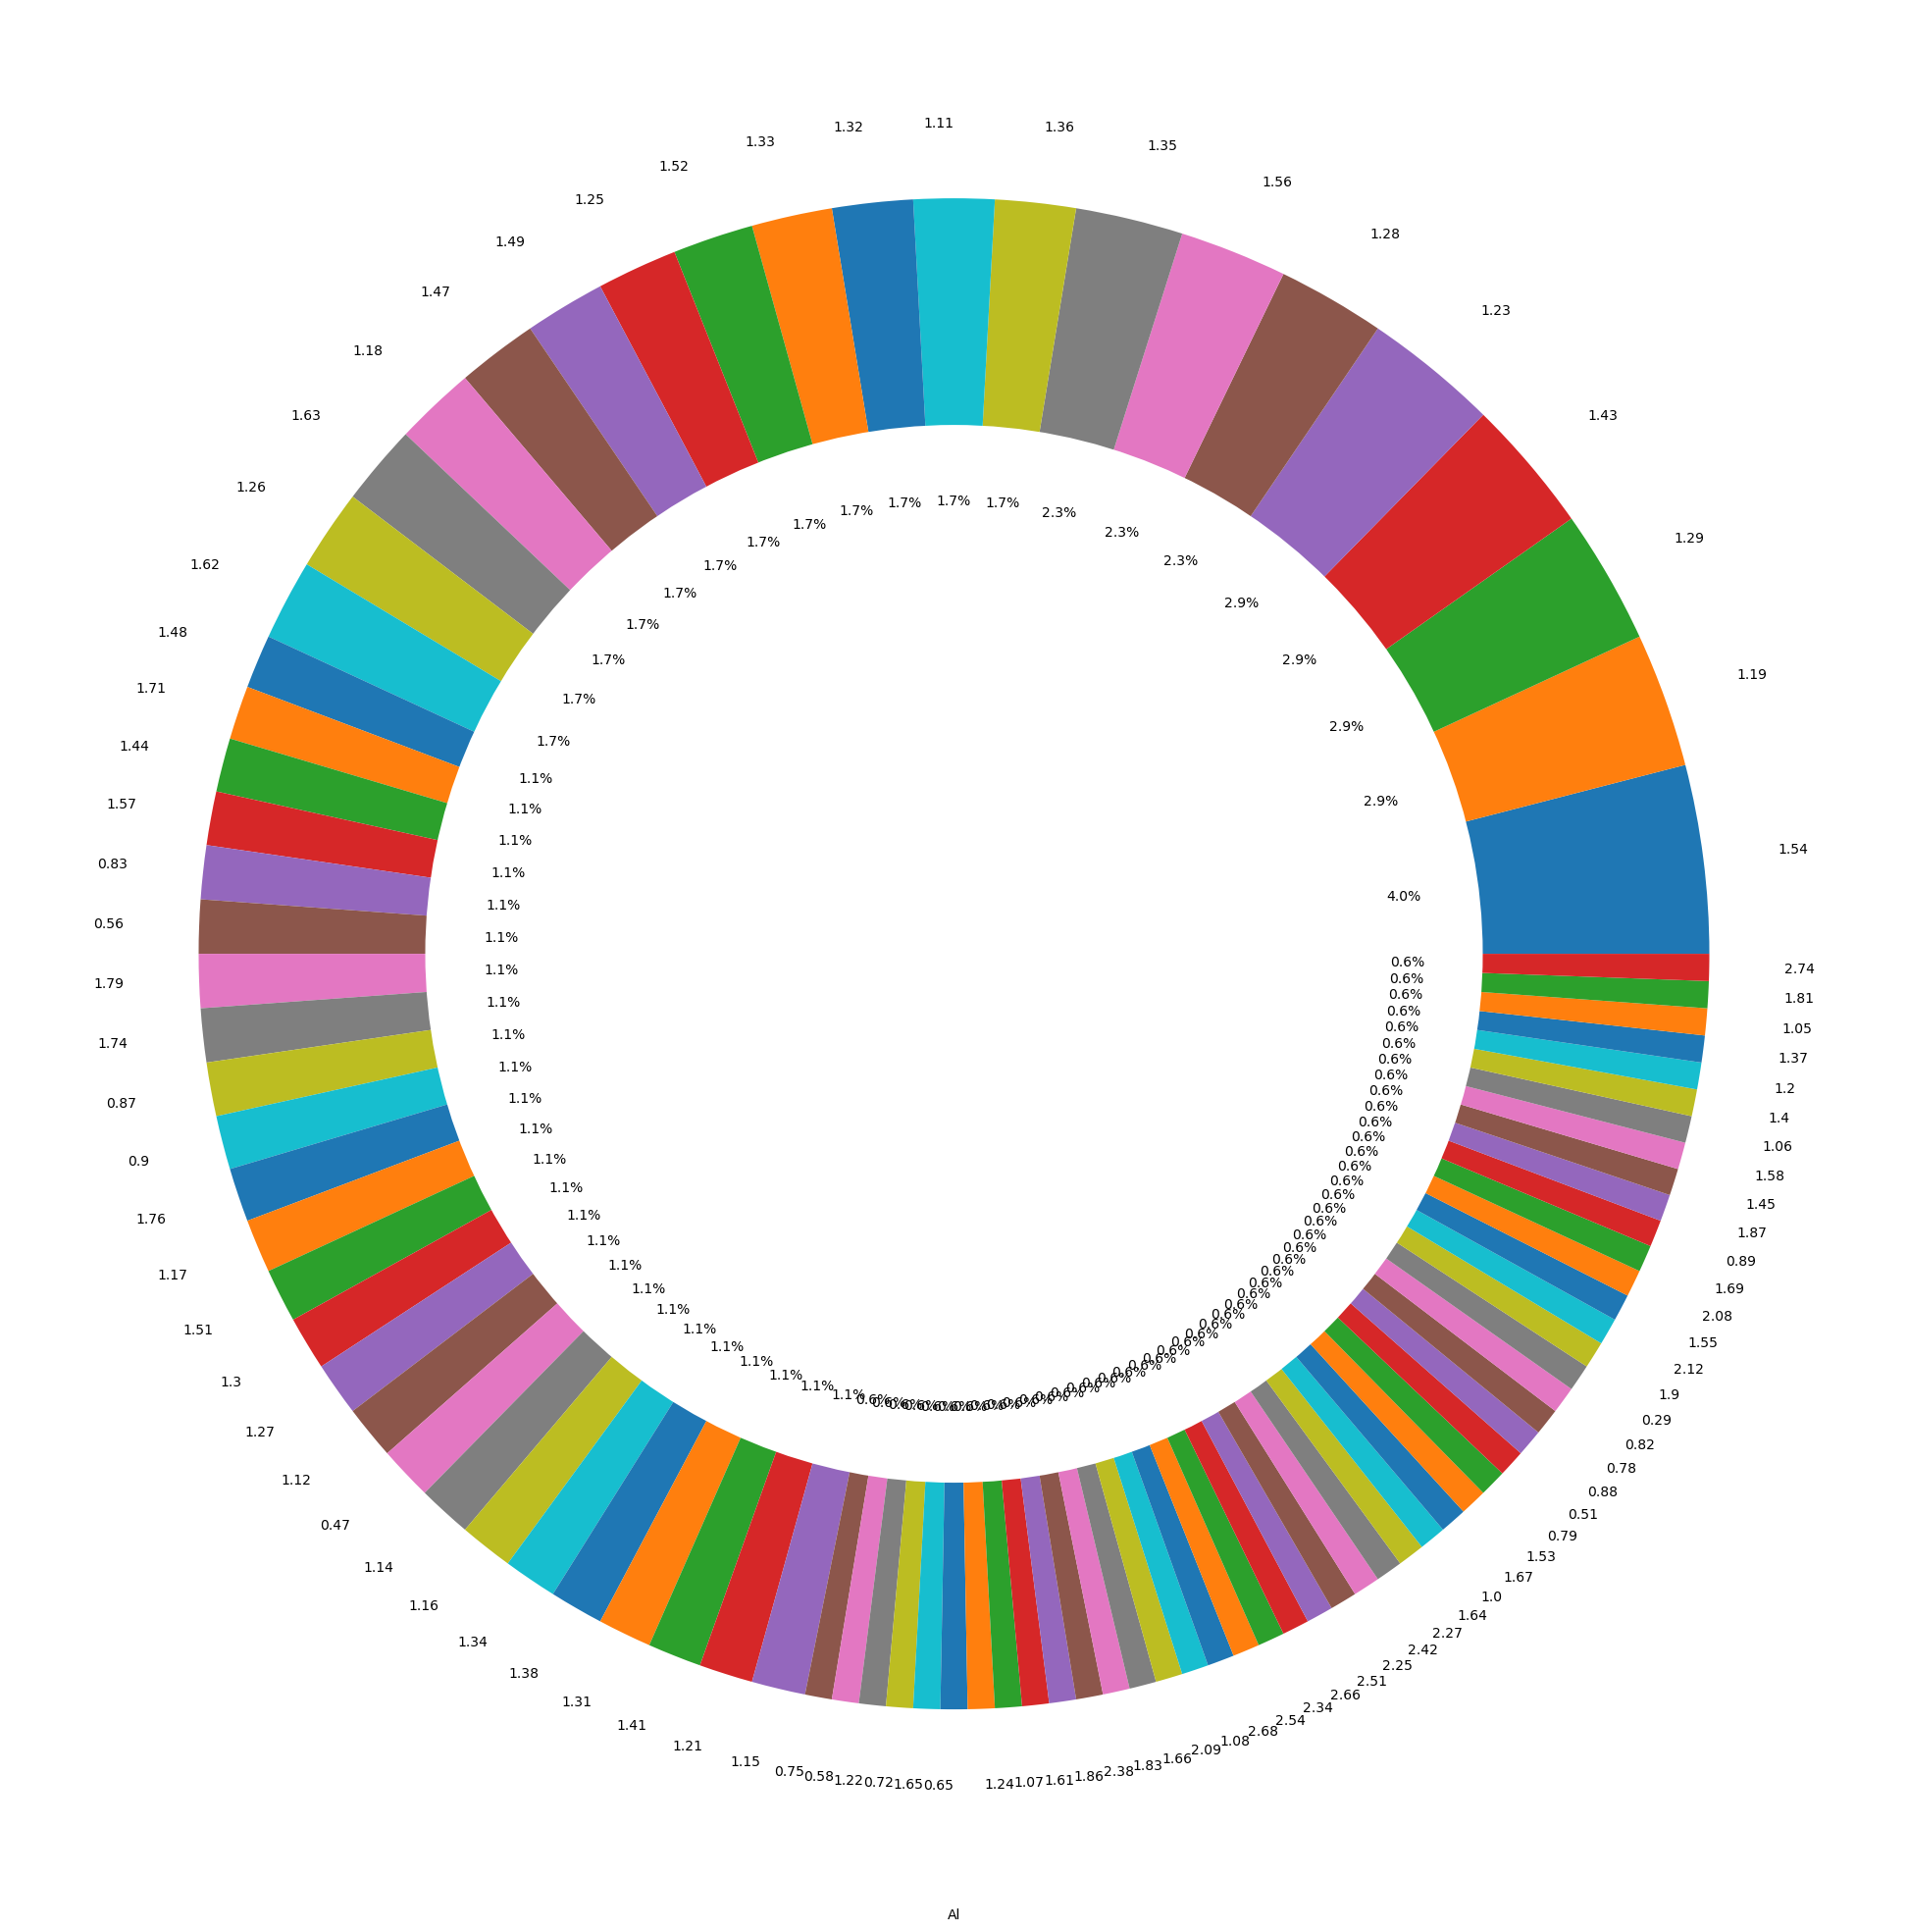

<Figure size 640x480 with 0 Axes>

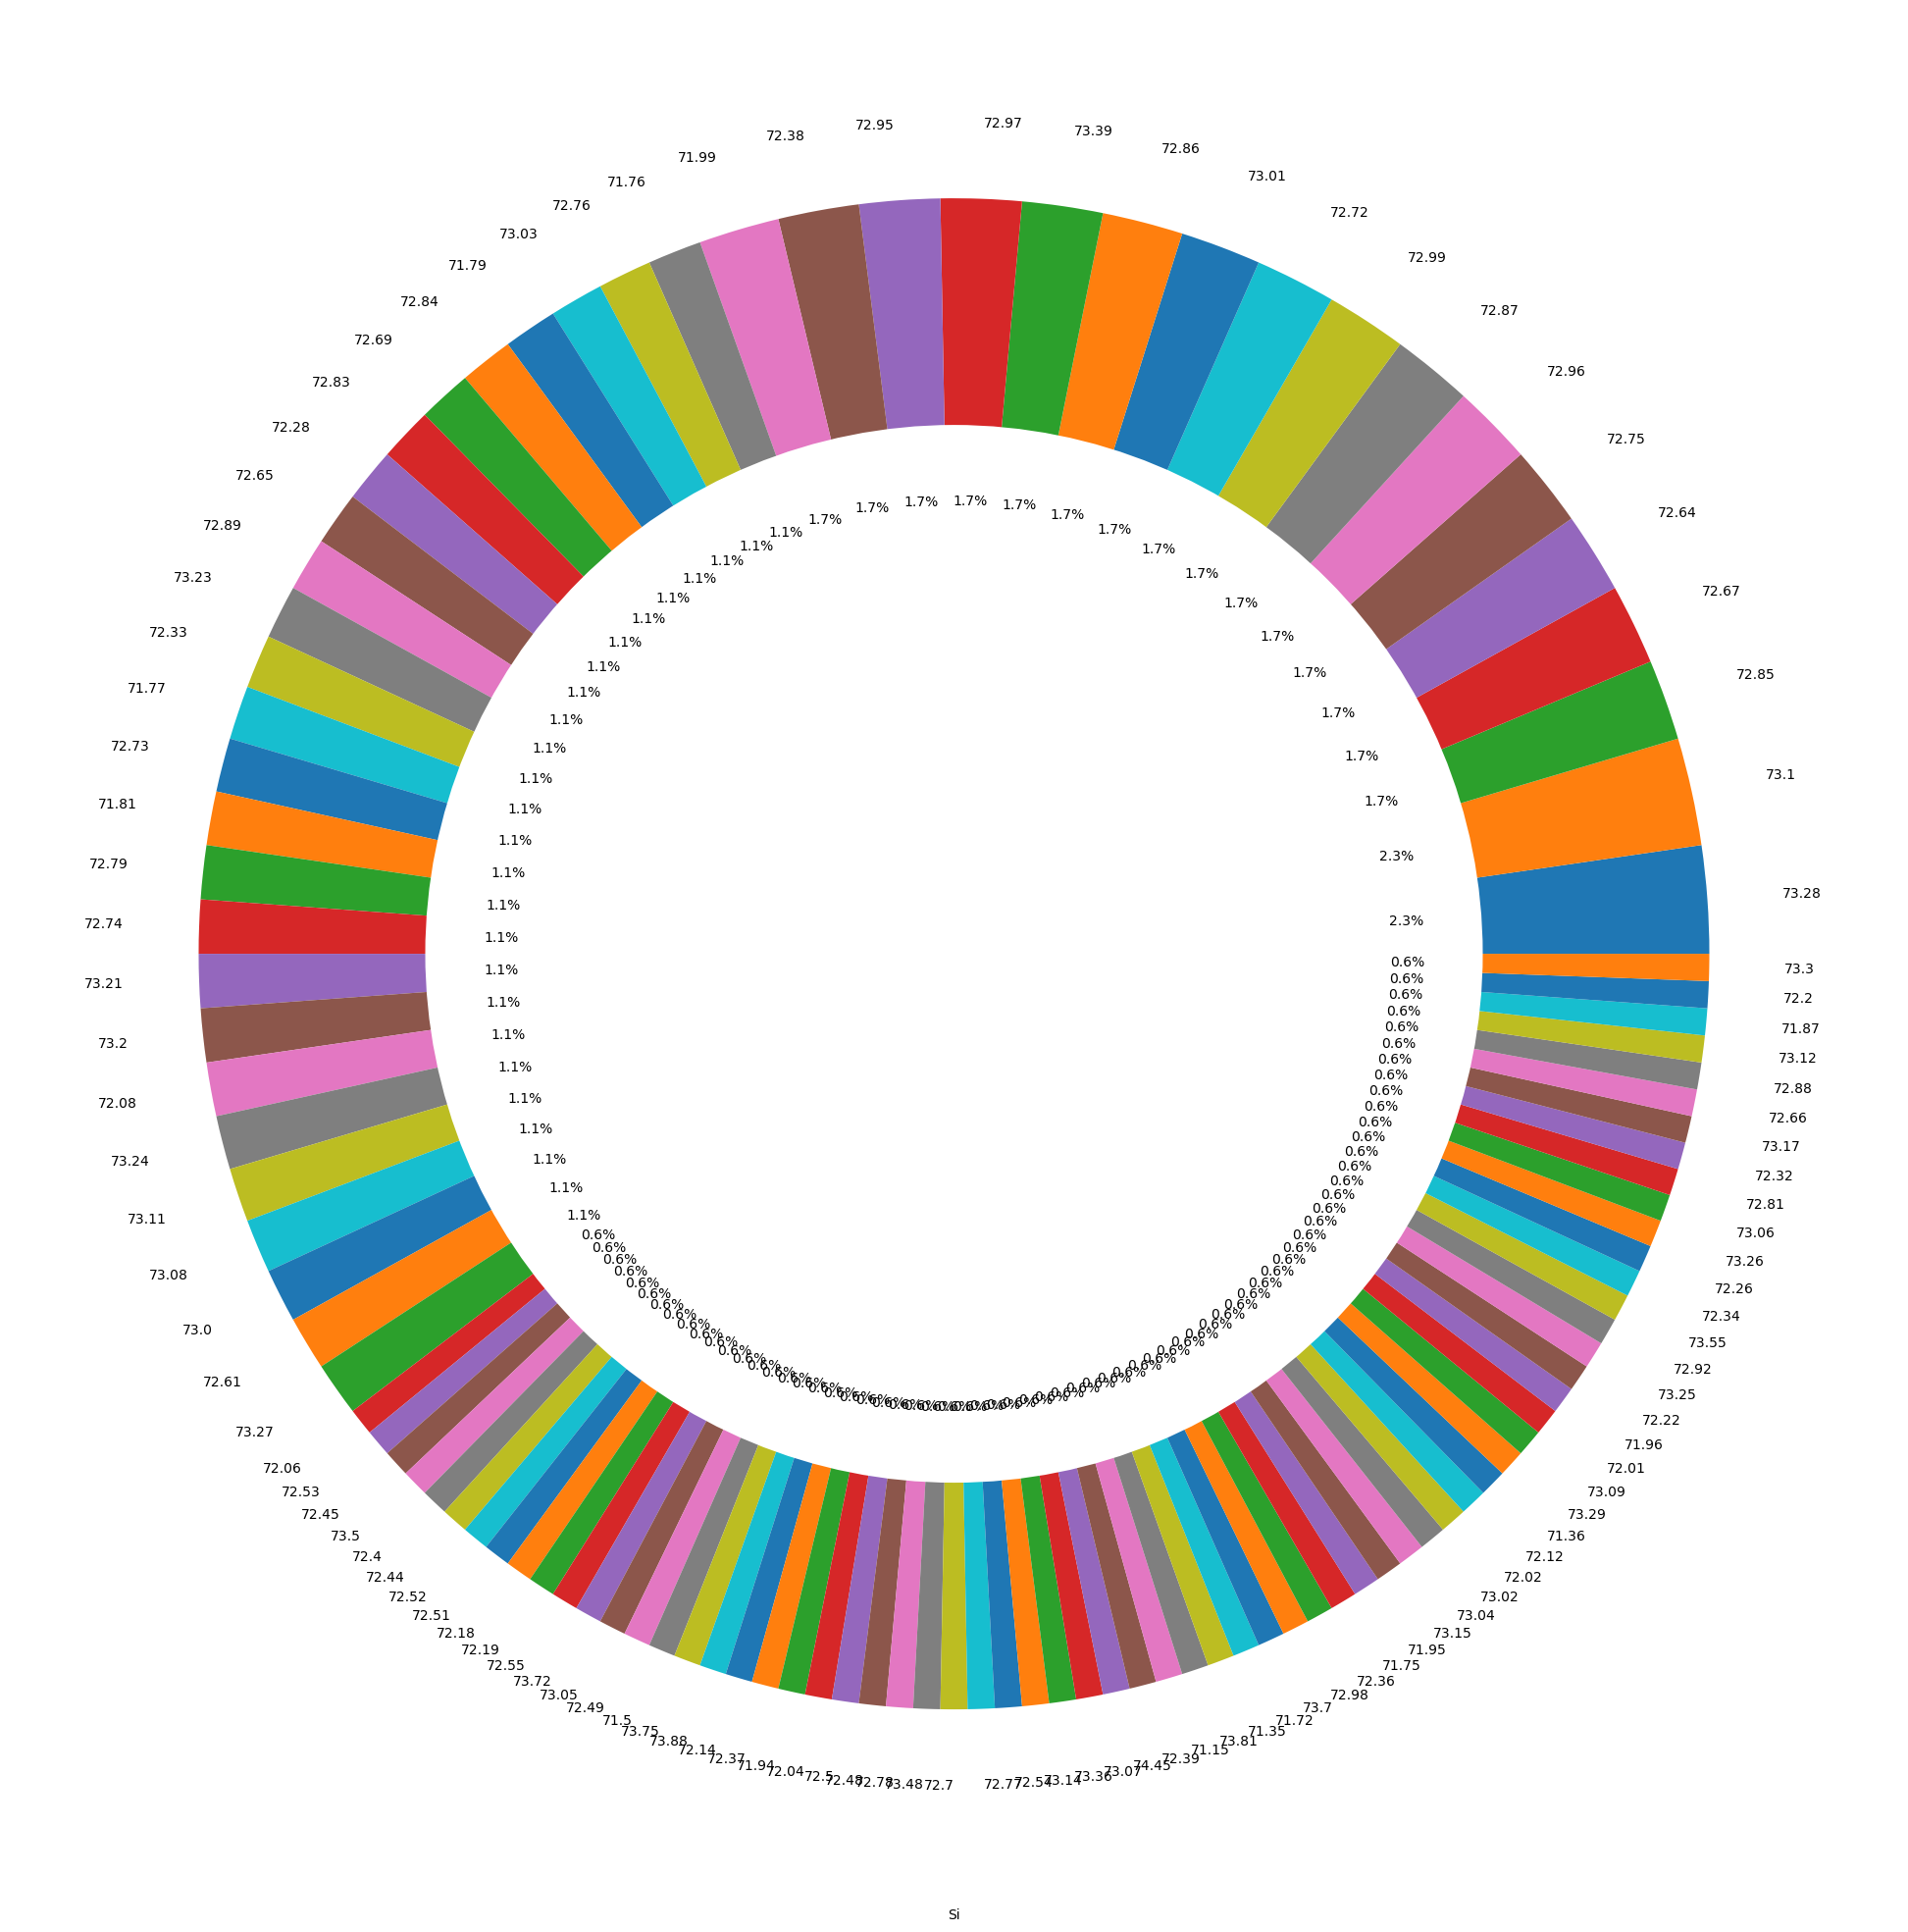

<Figure size 640x480 with 0 Axes>

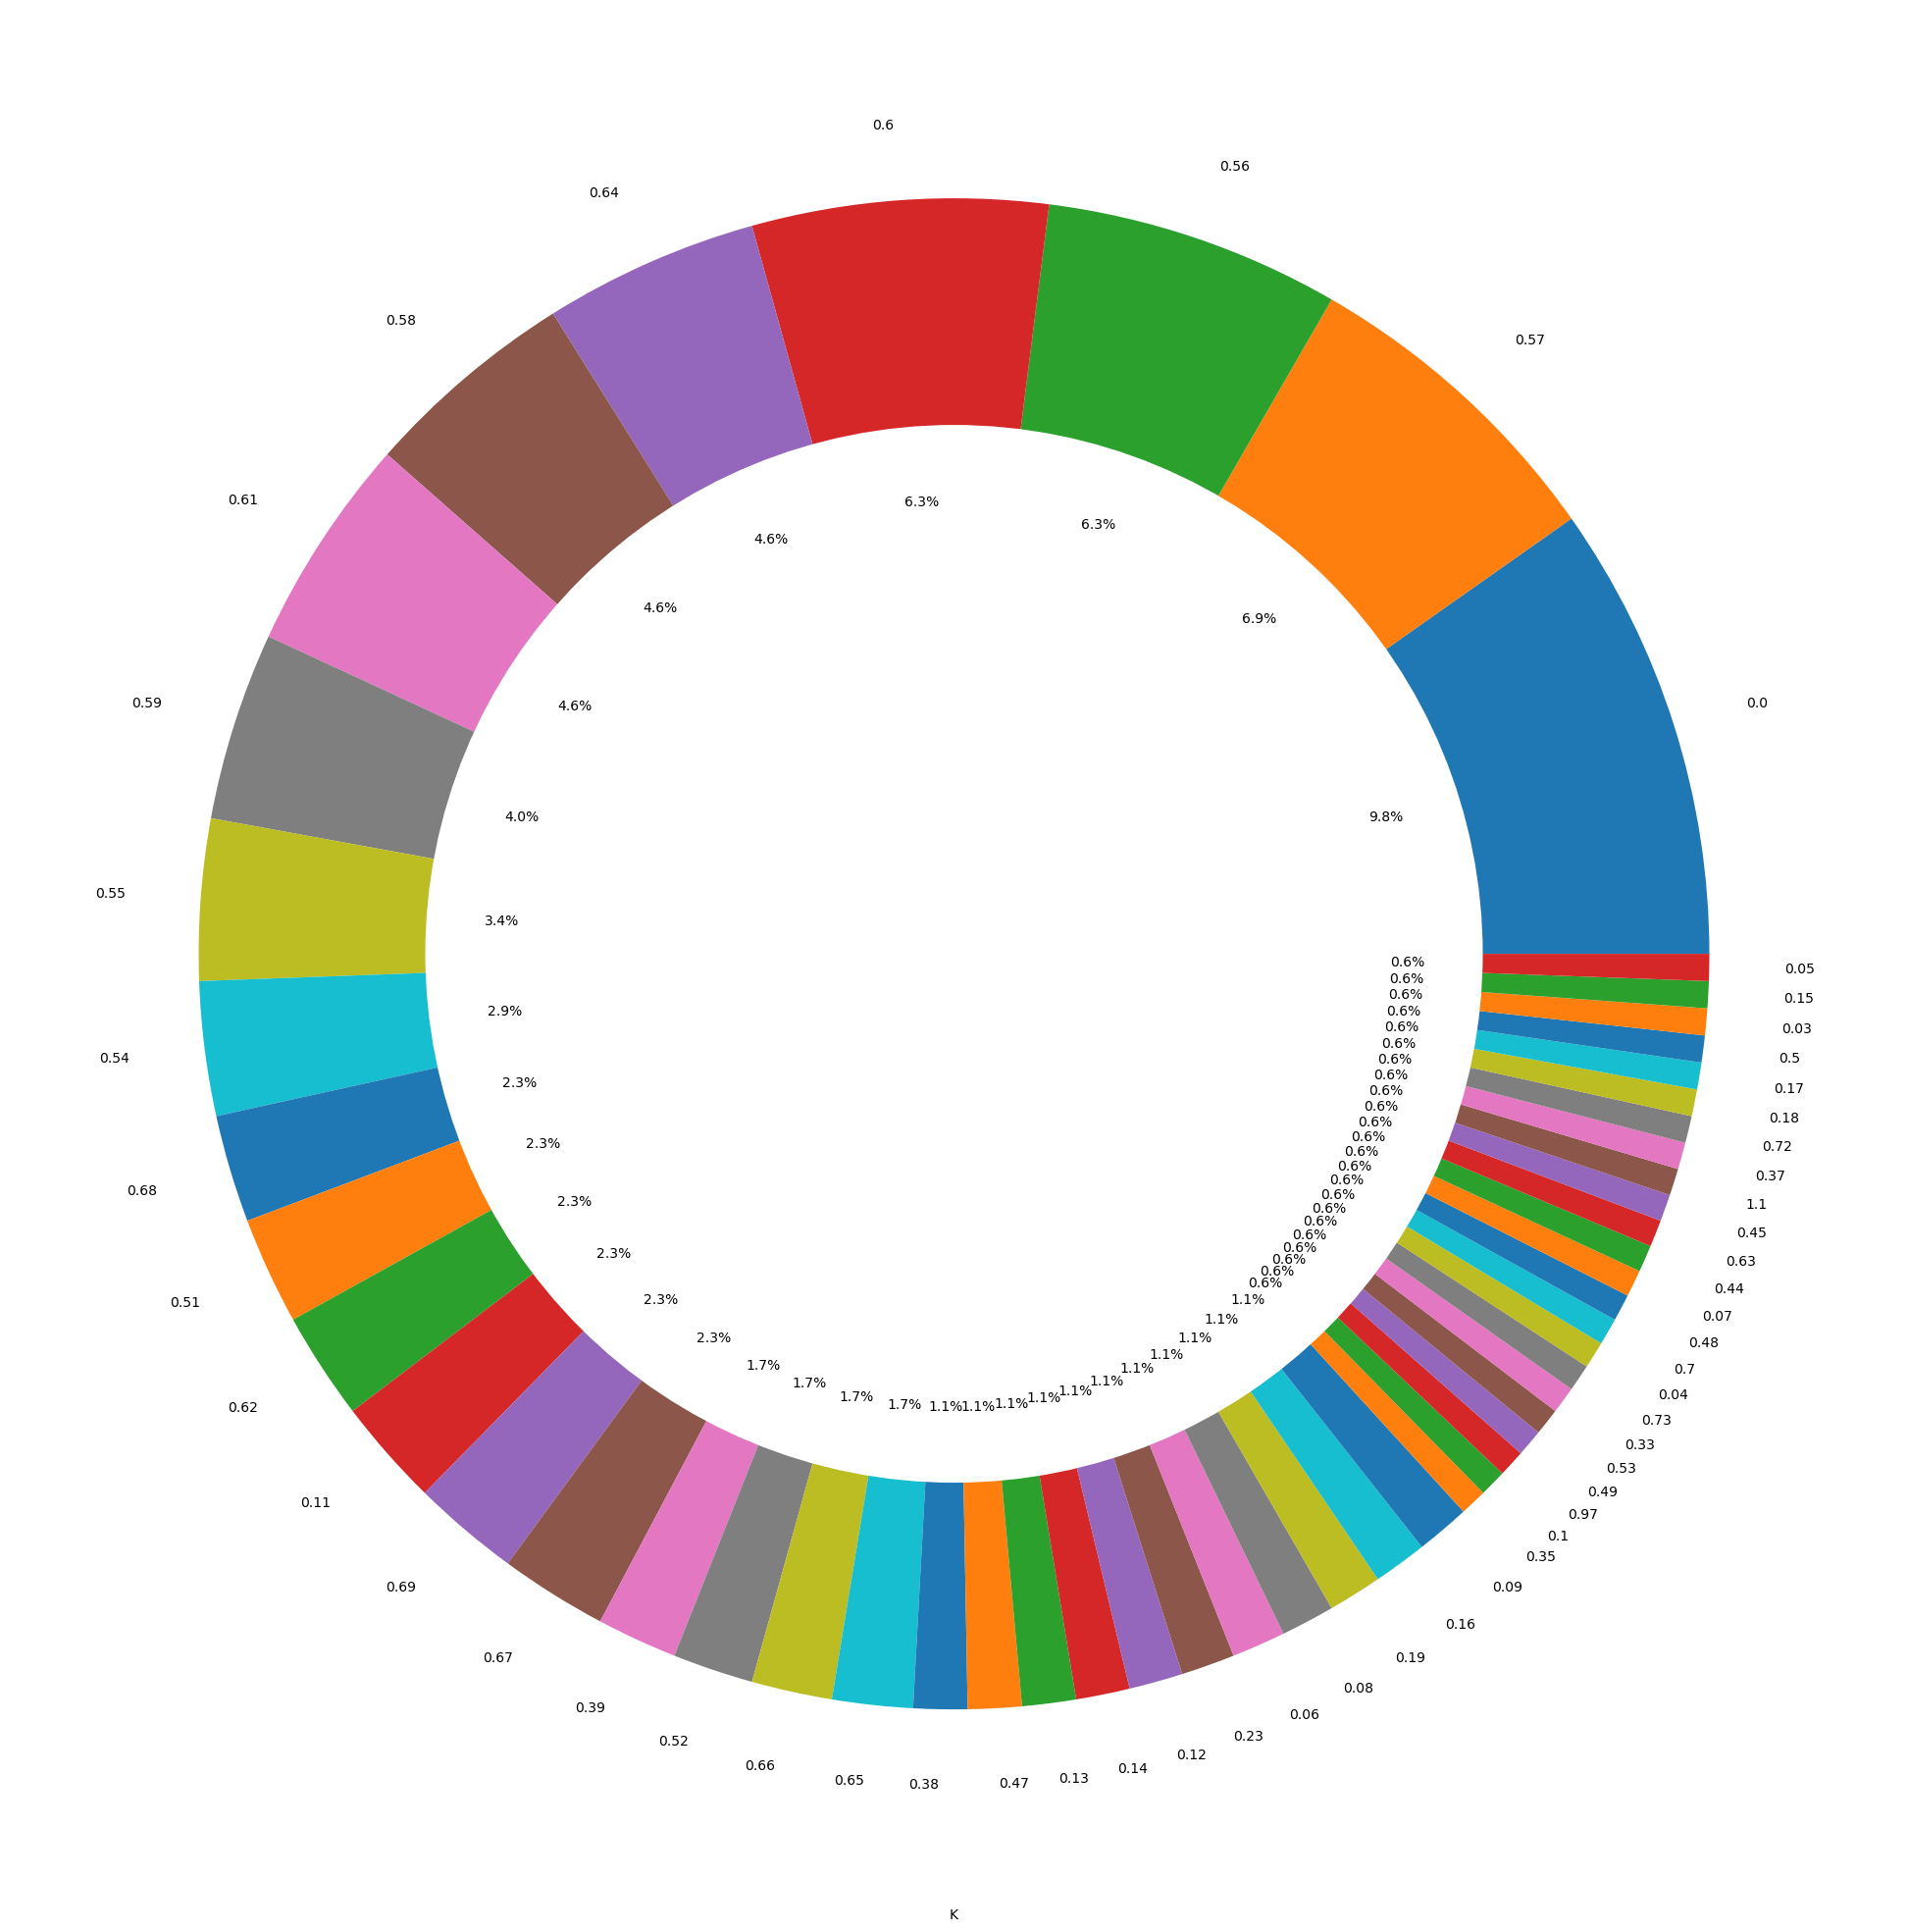

<Figure size 640x480 with 0 Axes>

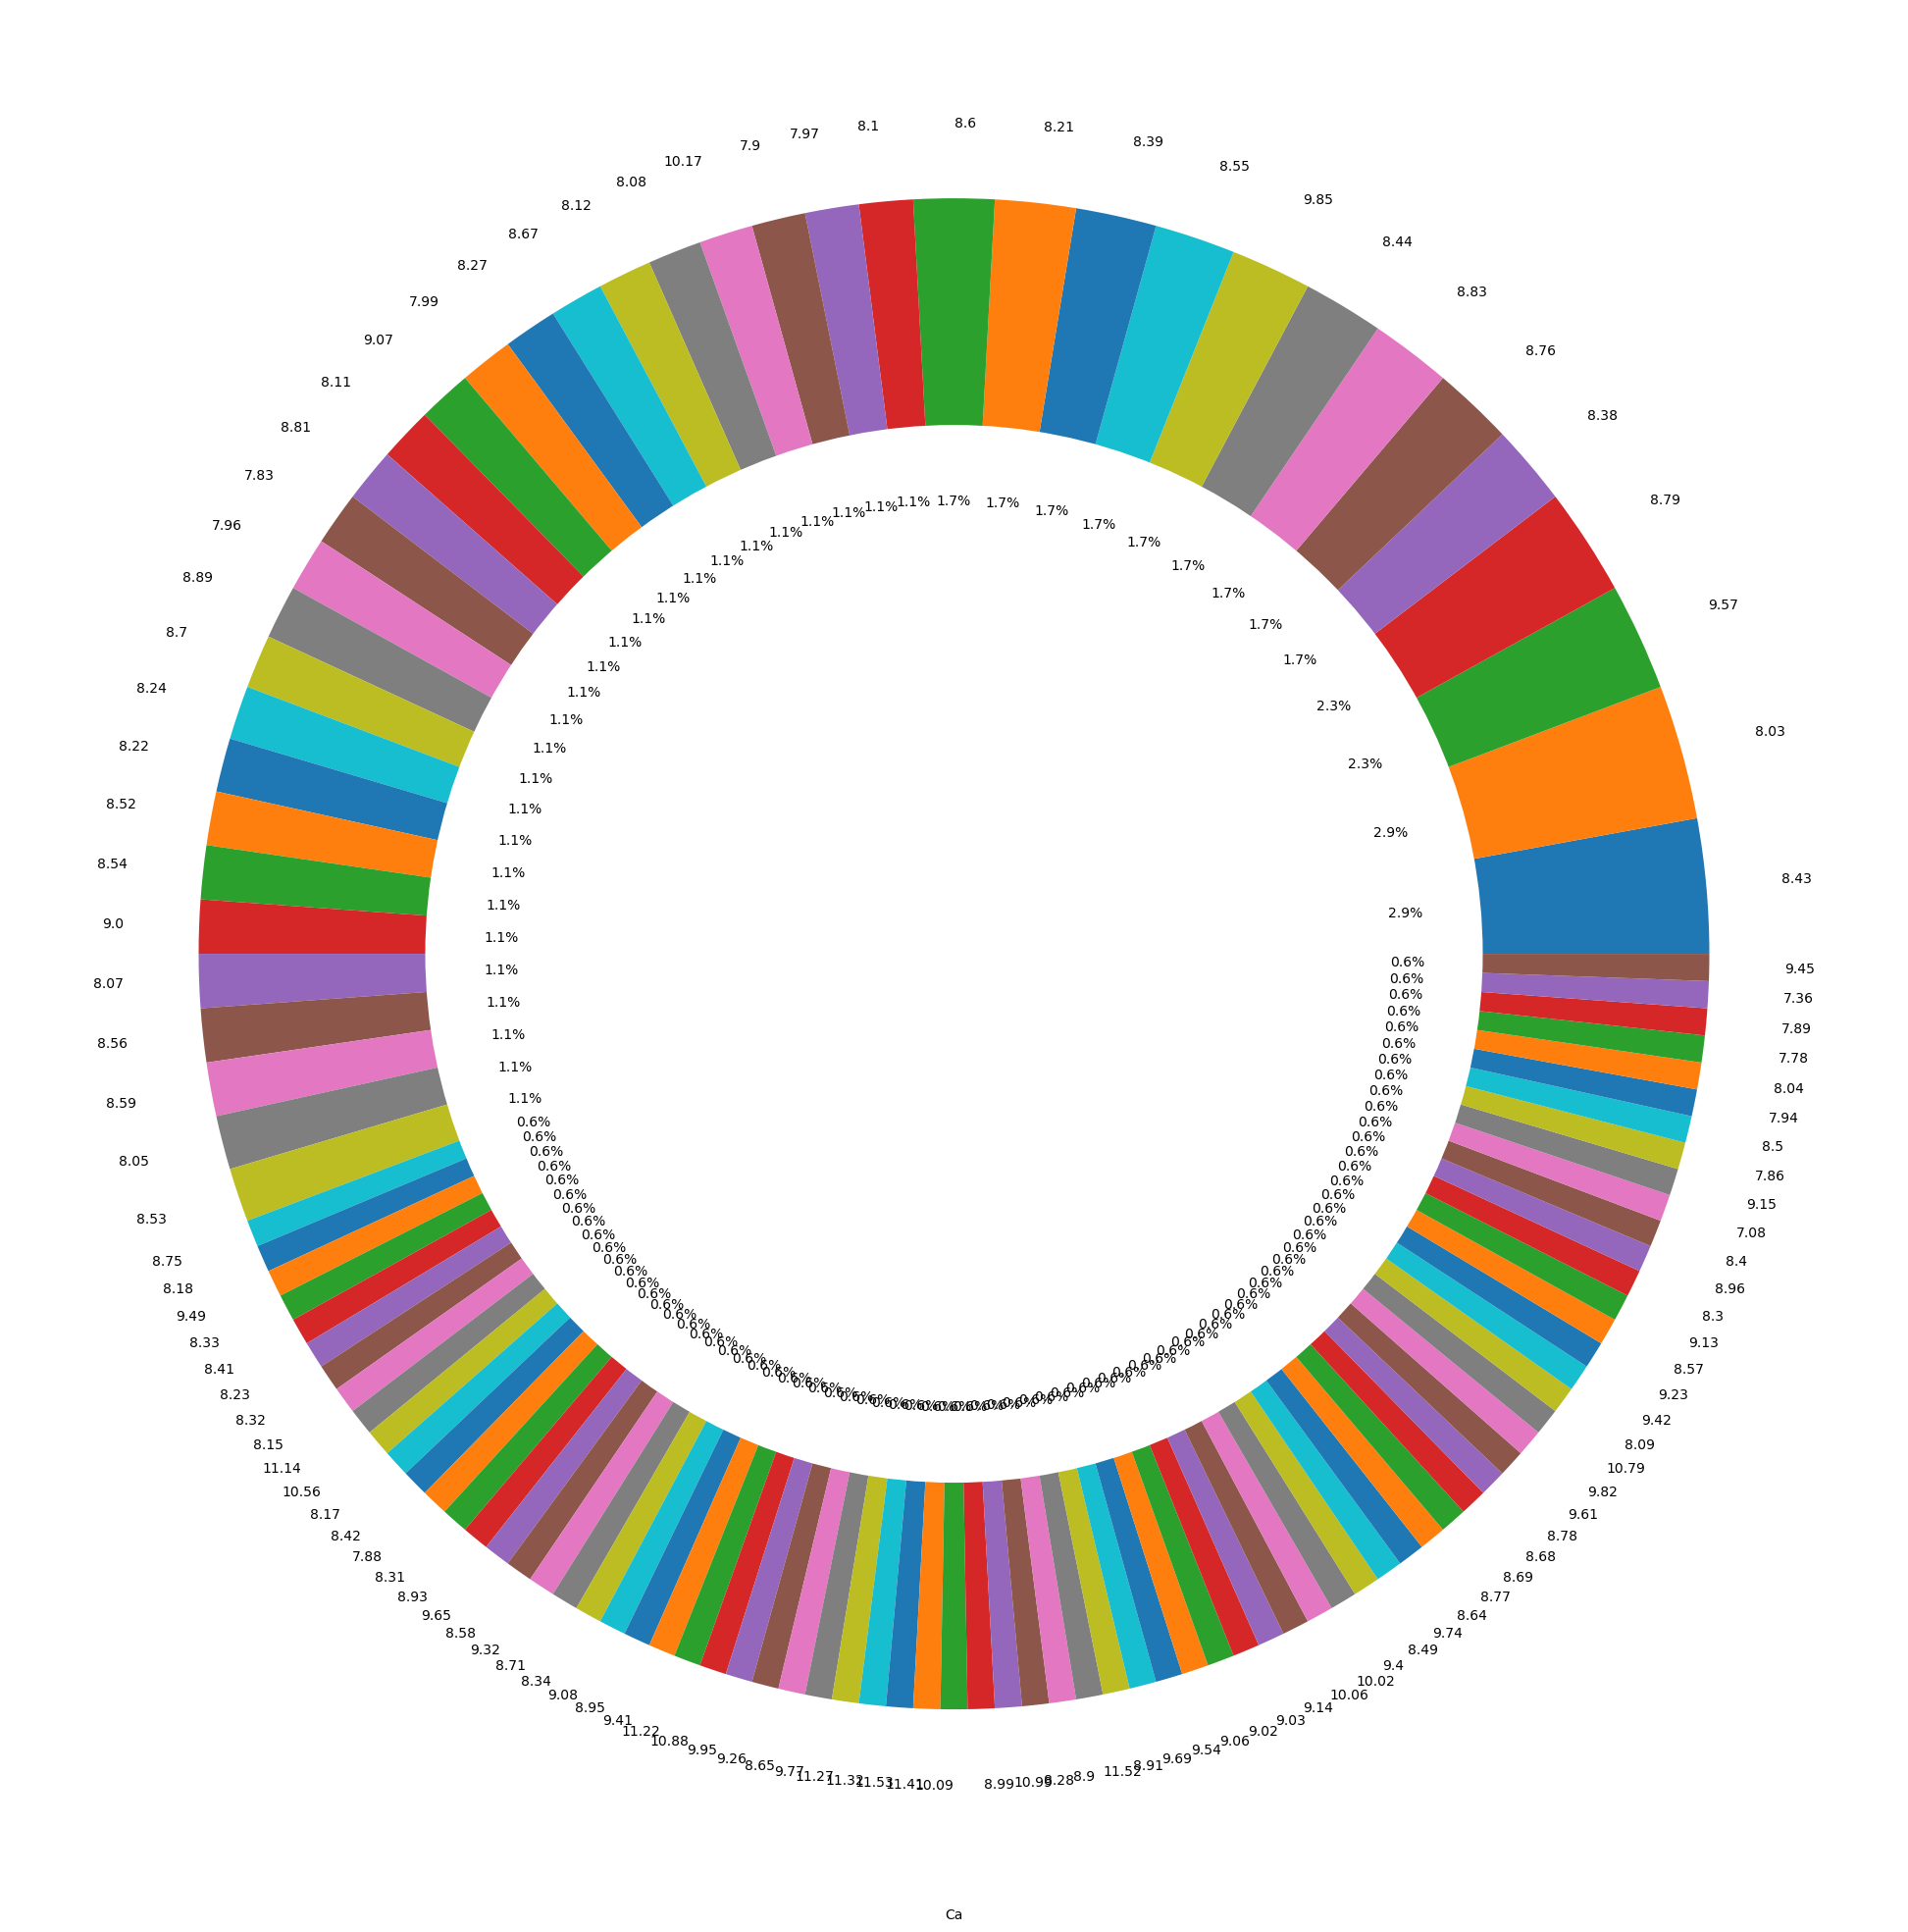

<Figure size 640x480 with 0 Axes>

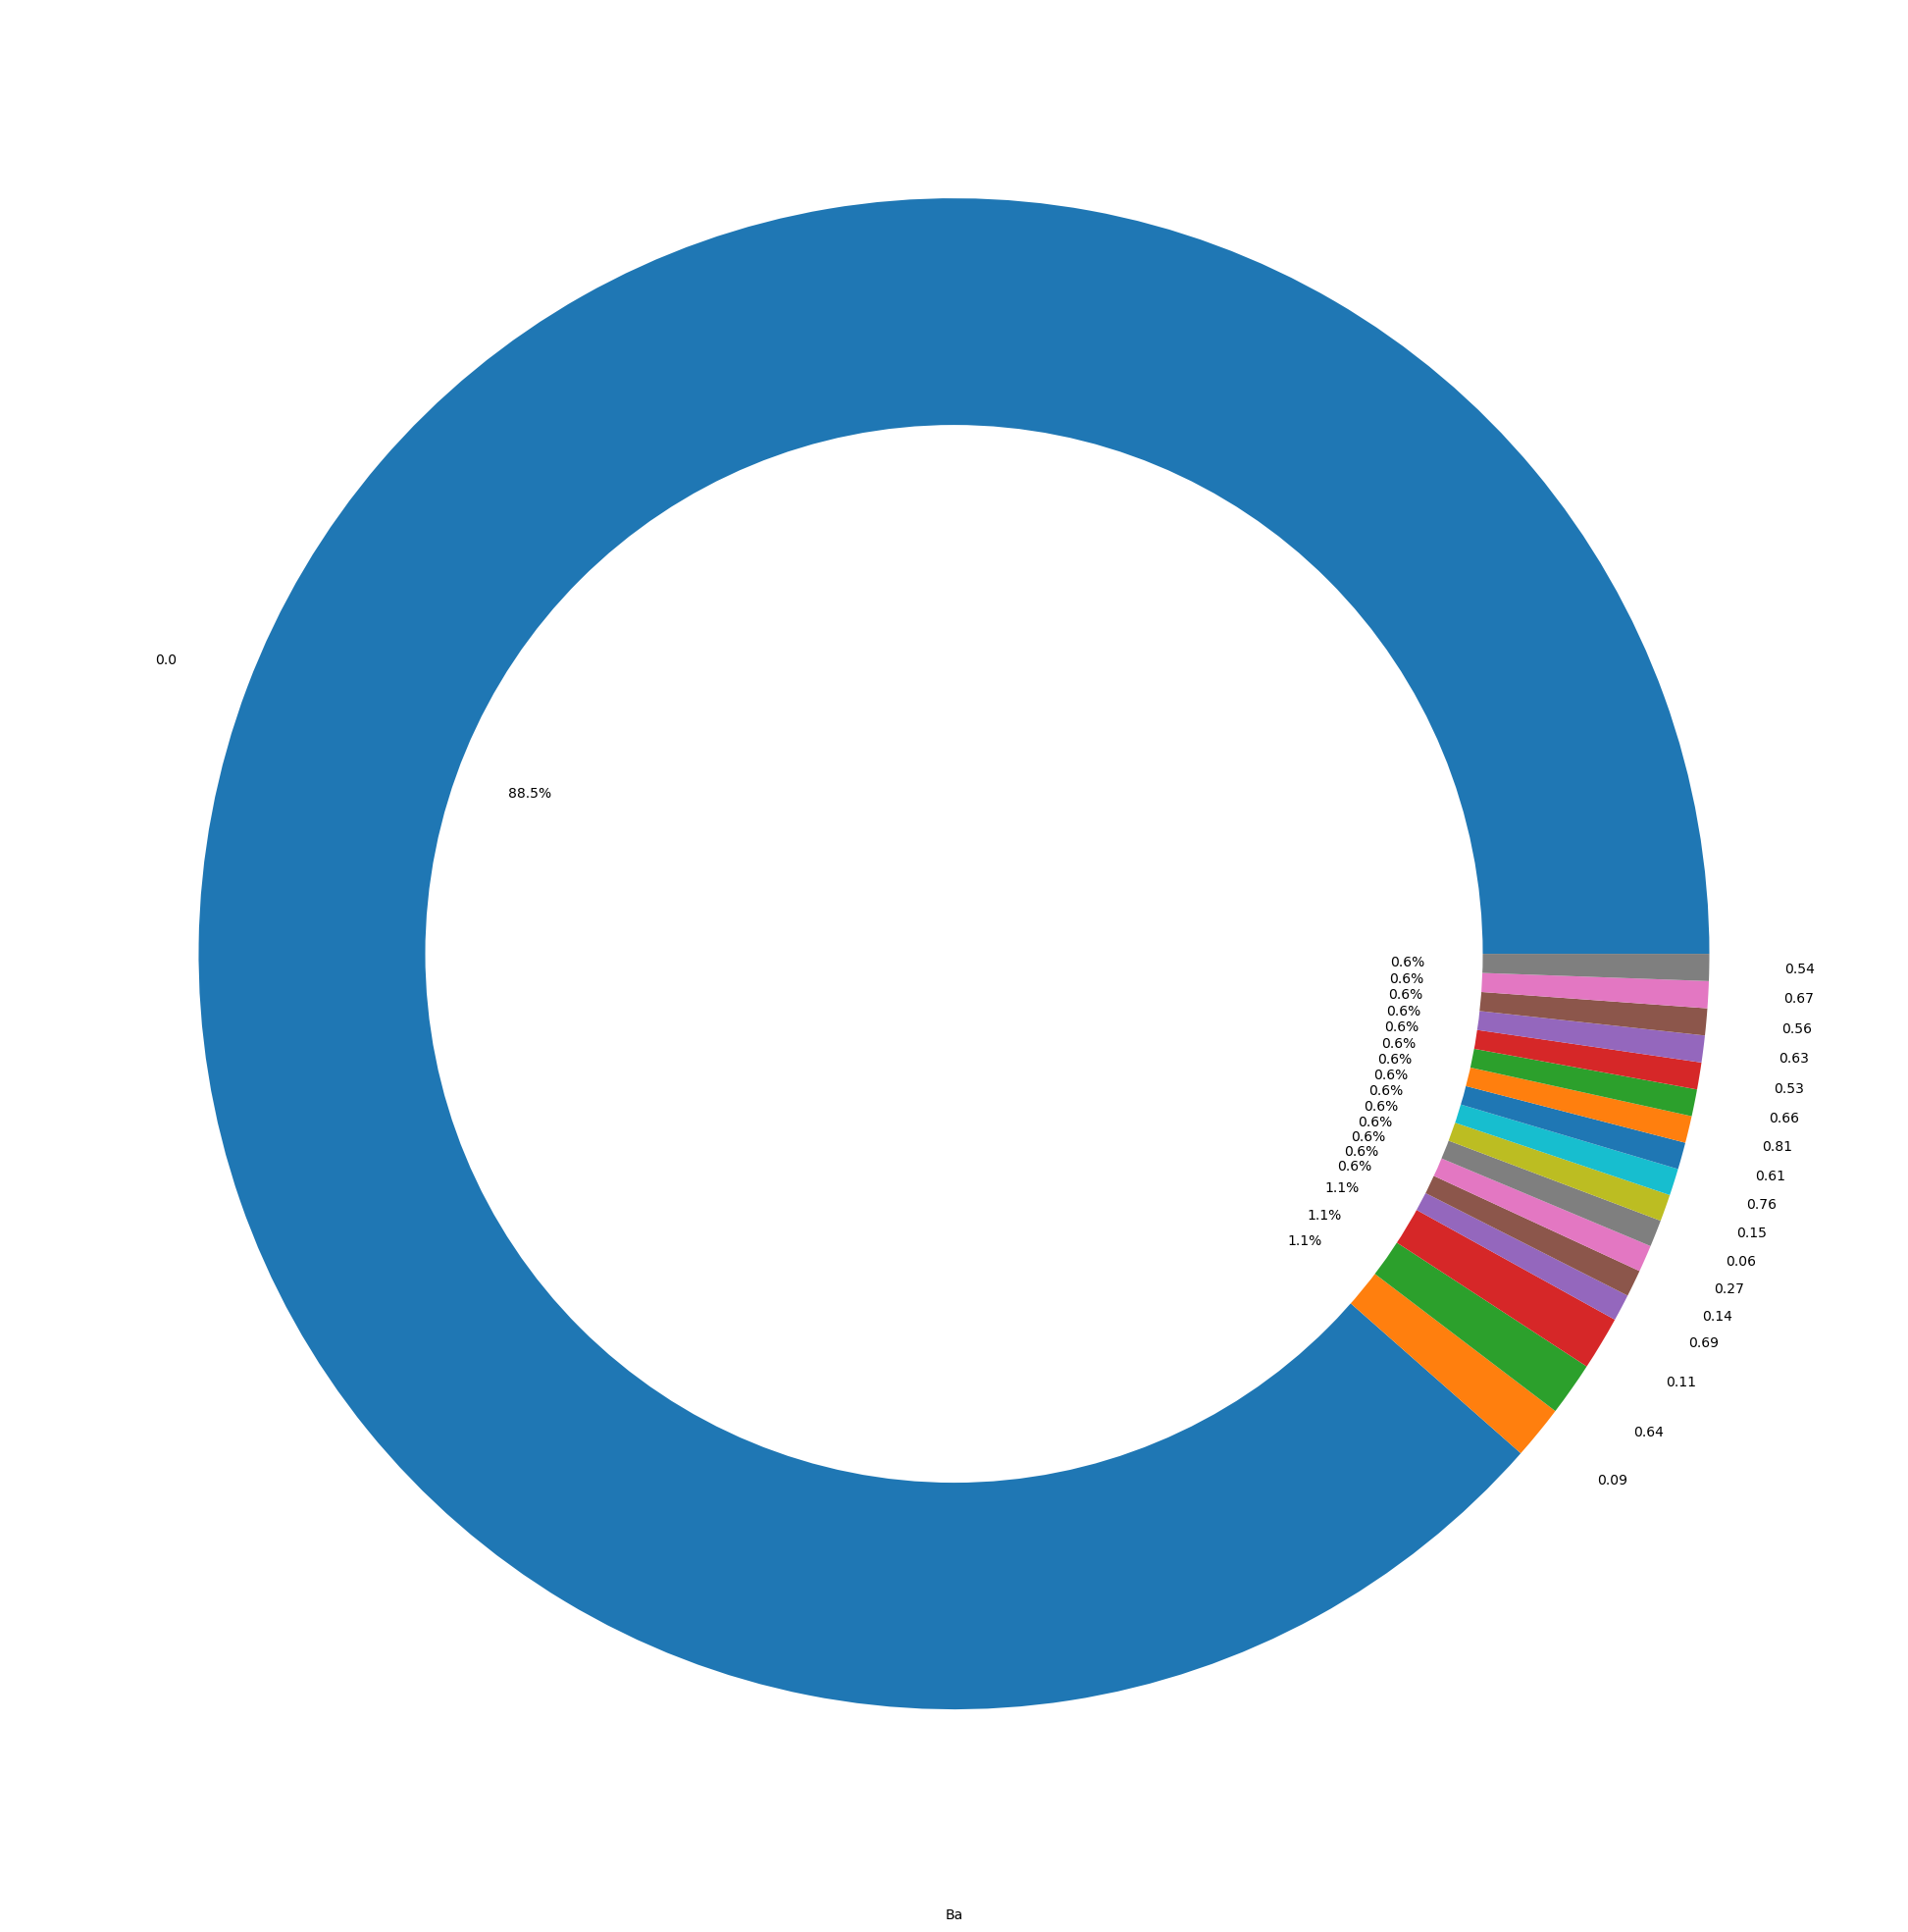

<Figure size 640x480 with 0 Axes>

In [429]:
for i in glass_type:
    if i!='Fe':
        plt.figure(figsize=(35,25))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()


# Barplot:

Text(0.5, 1.0, 'glass_type')

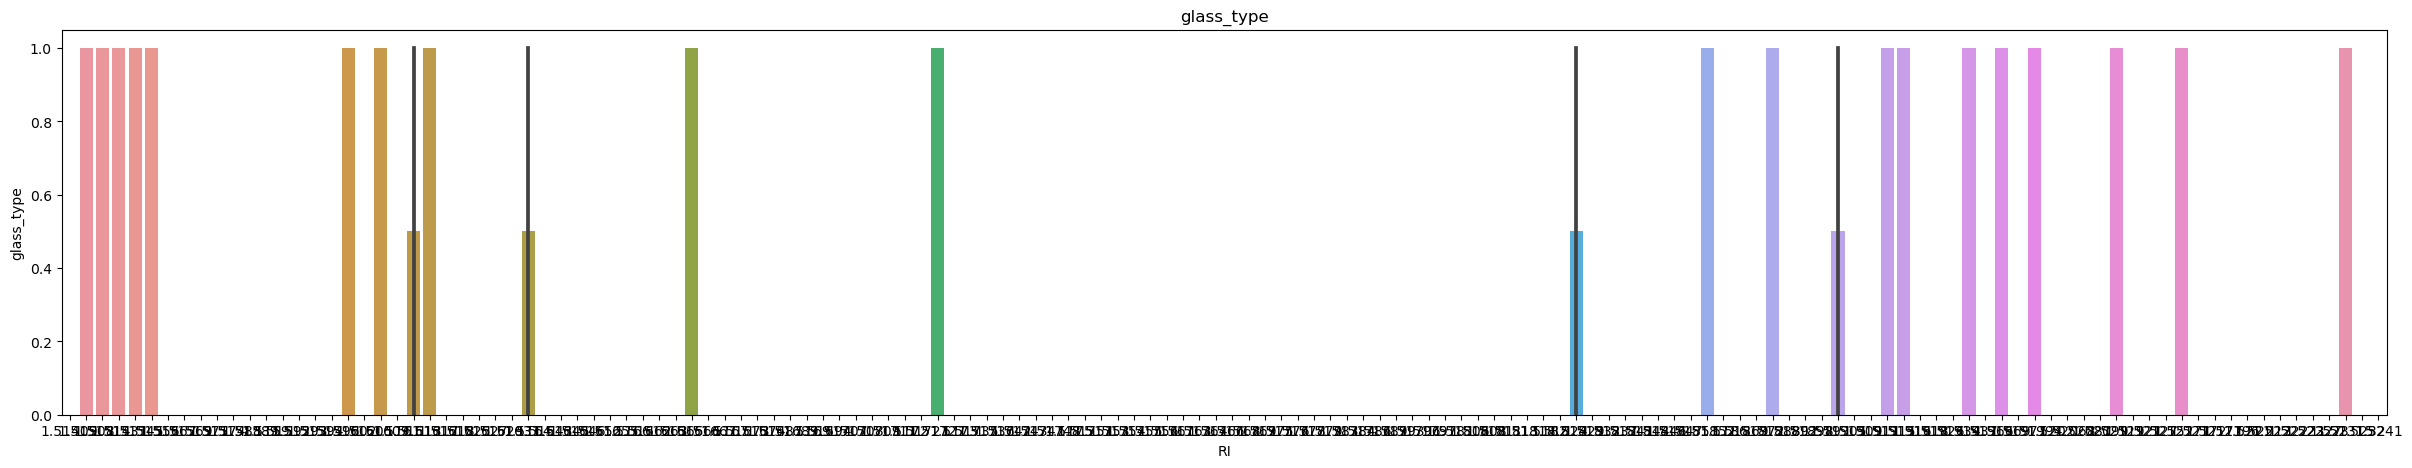

In [426]:
#barplot:
plt.figure(figsize=(30,5))
sns.barplot(x='RI', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

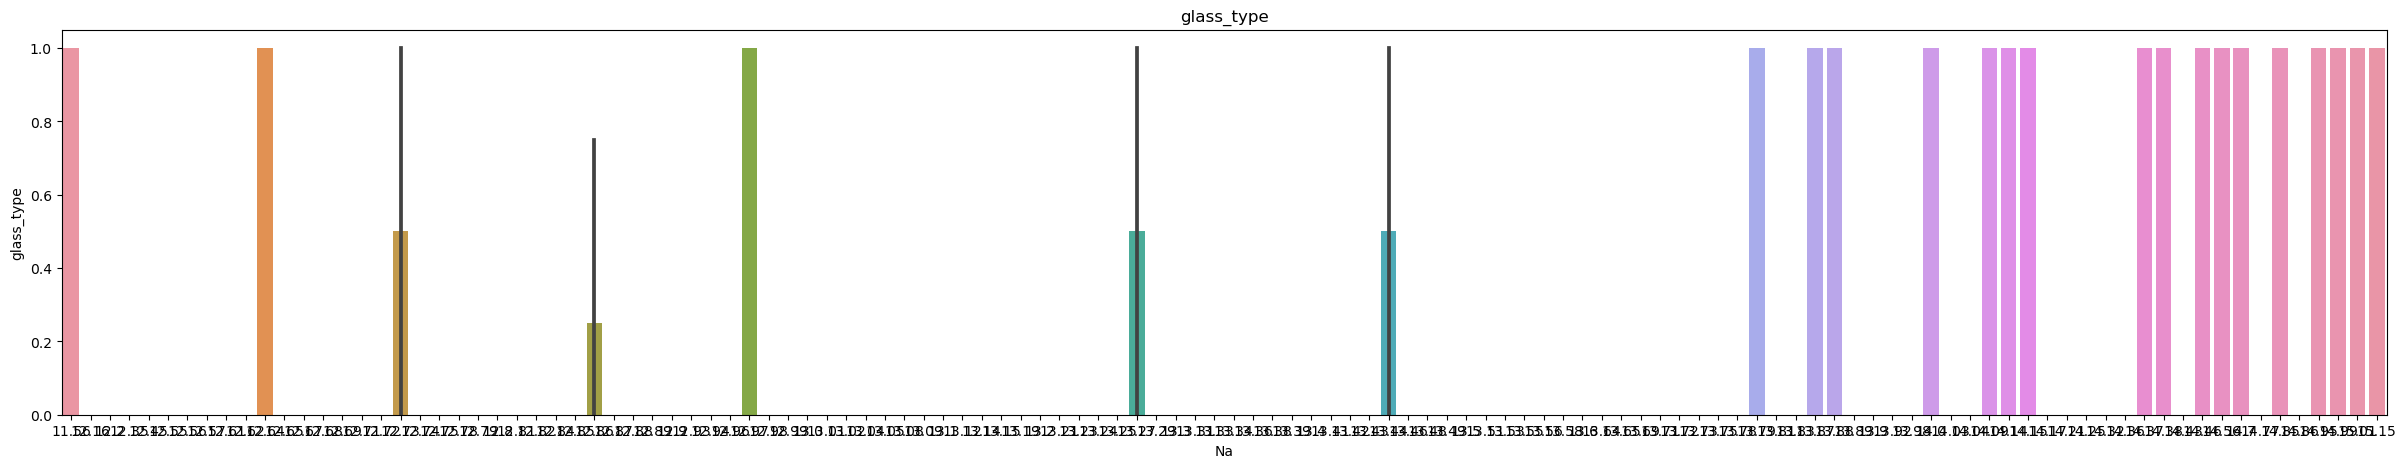

In [425]:
#barplot:
plt.figure(figsize=(30,5))
sns.barplot(x='Na', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

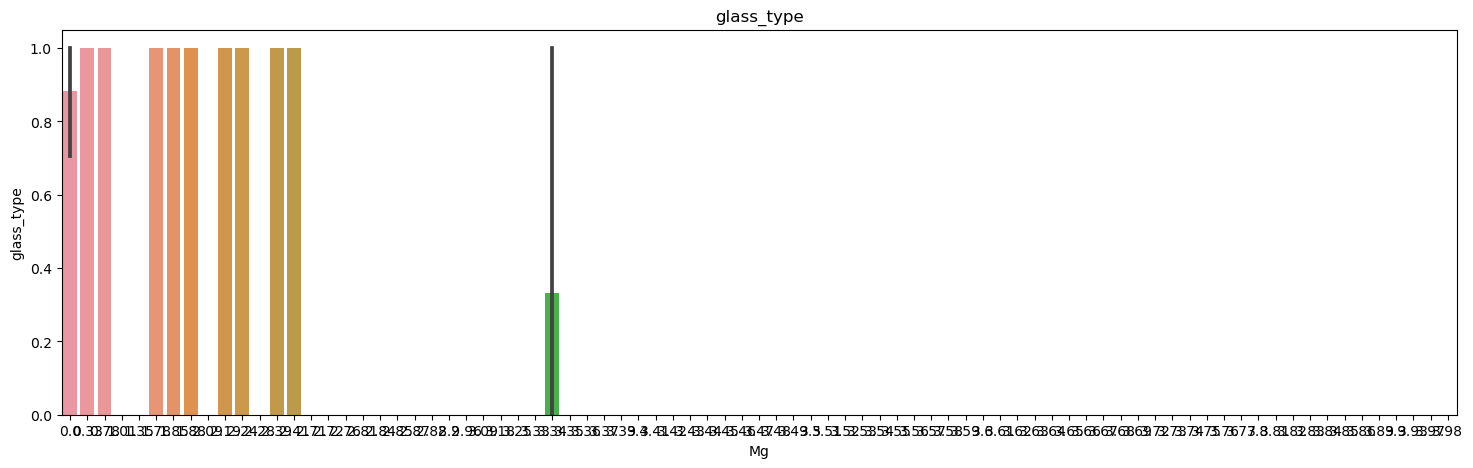

In [401]:
#barplot:
plt.figure(figsize=(18,5))
sns.barplot(x='Mg', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

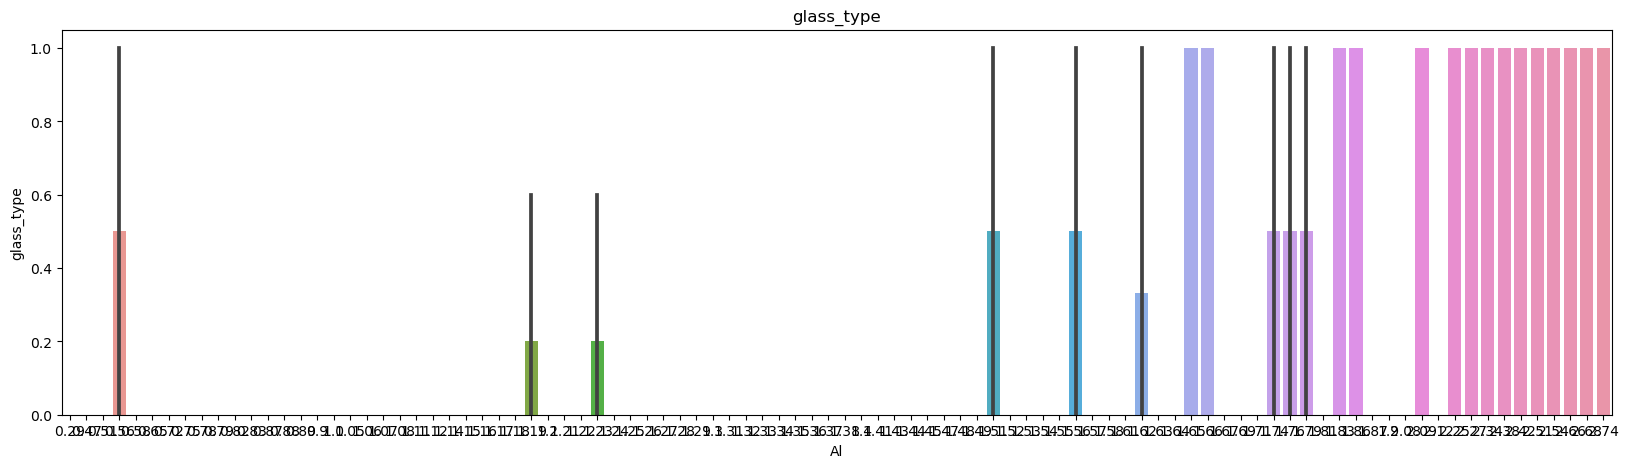

In [423]:
#barplot:
plt.figure(figsize=(20,5))
sns.barplot(x='Al', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

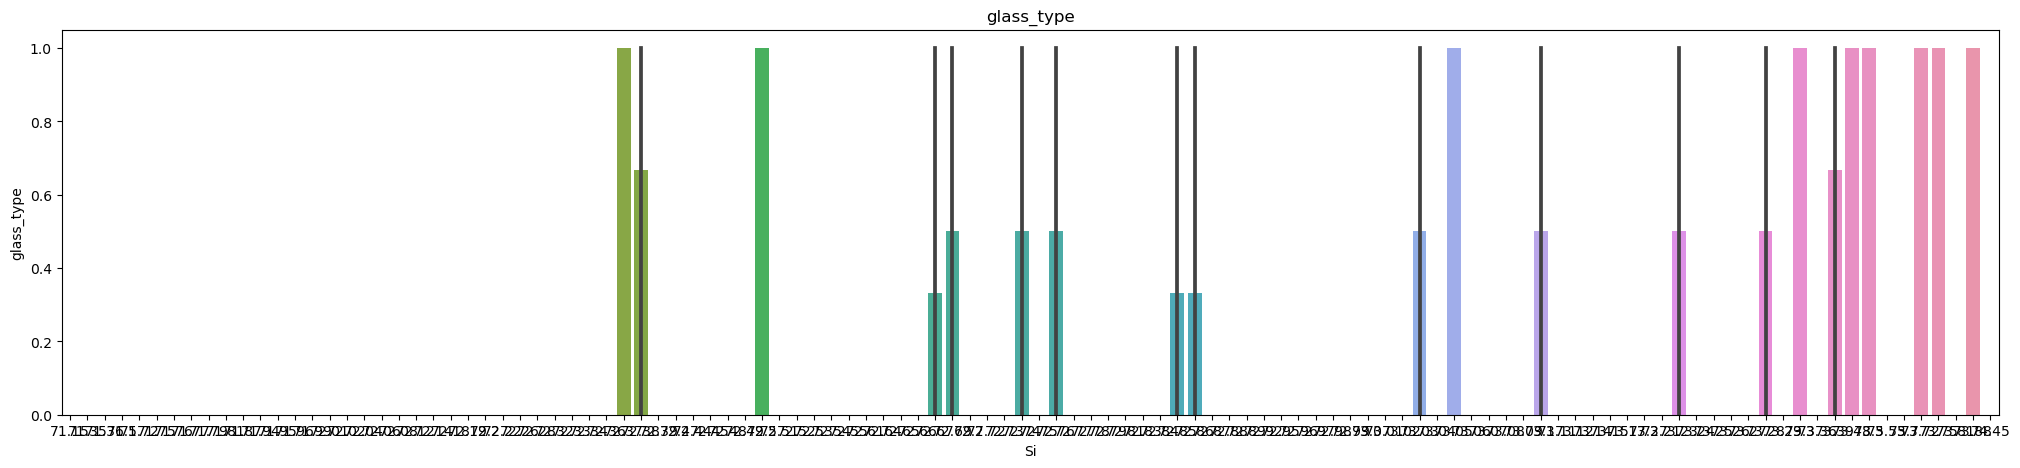

In [400]:
#barplot:
plt.figure(figsize=(25,5))
sns.barplot(x='Si', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

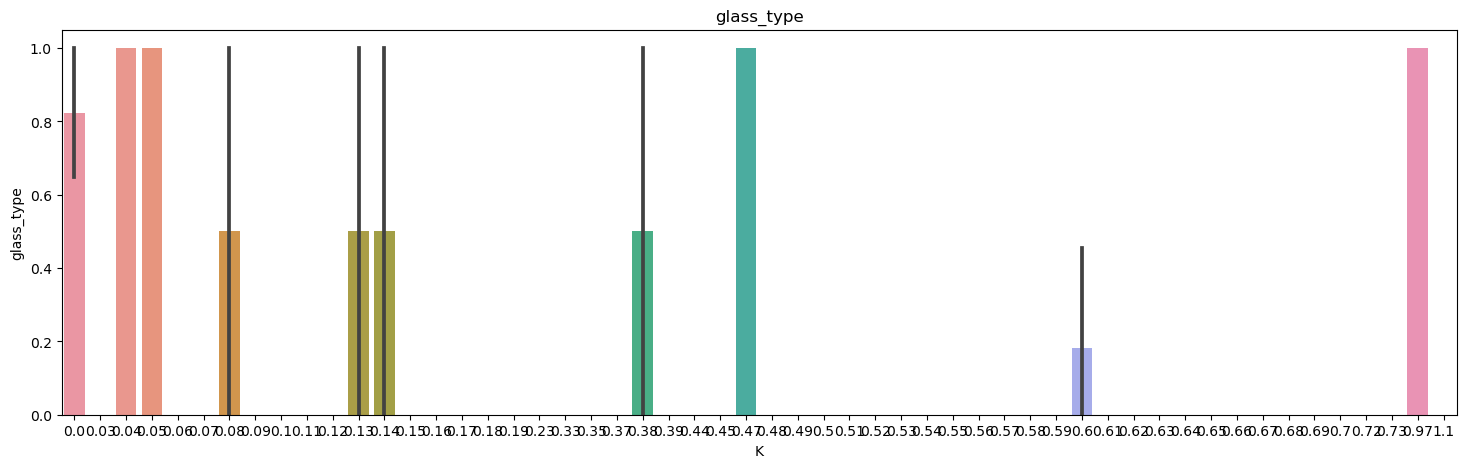

In [393]:
#barplot:
plt.figure(figsize=(18,5))
sns.barplot(x='K', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

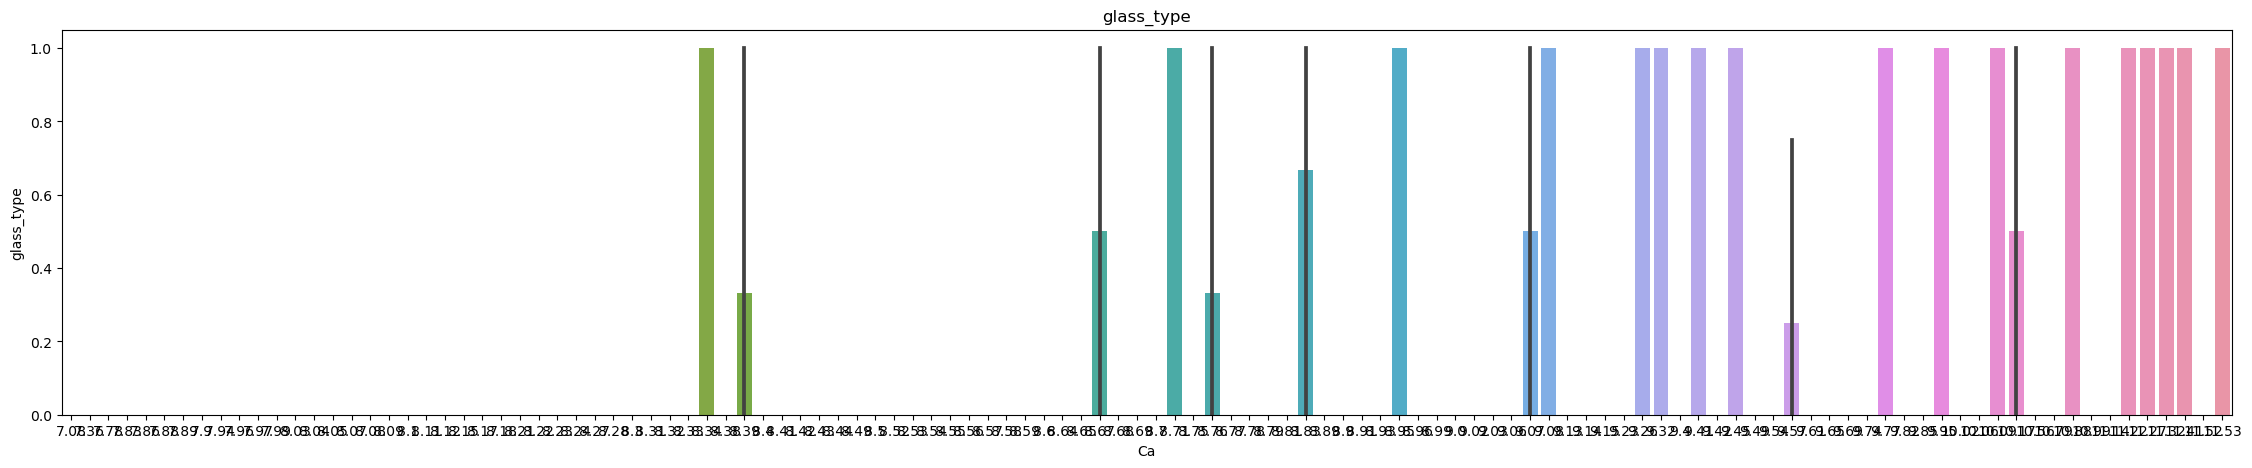

In [441]:
#barplot:
plt.figure(figsize=(28,5))
sns.barplot(x='Ca', y='glass_type', data=df)
plt.title('glass_type')

Text(0.5, 1.0, 'glass_type')

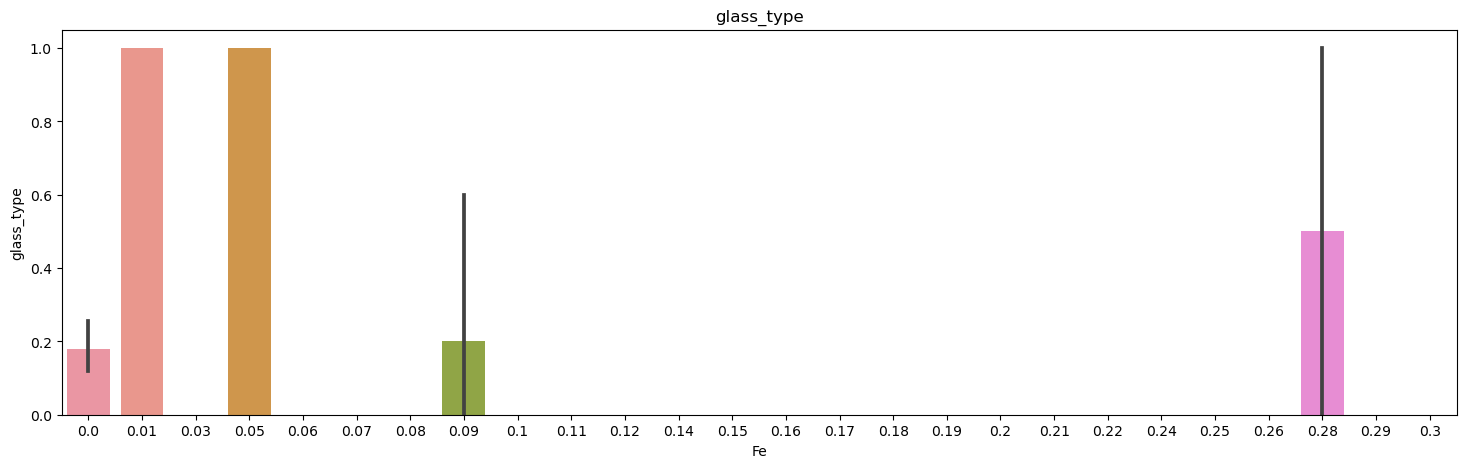

In [396]:
#barplot:
plt.figure(figsize=(18,5))
sns.barplot(x='Fe', y='glass_type', data=df)
plt.title('glass_type')

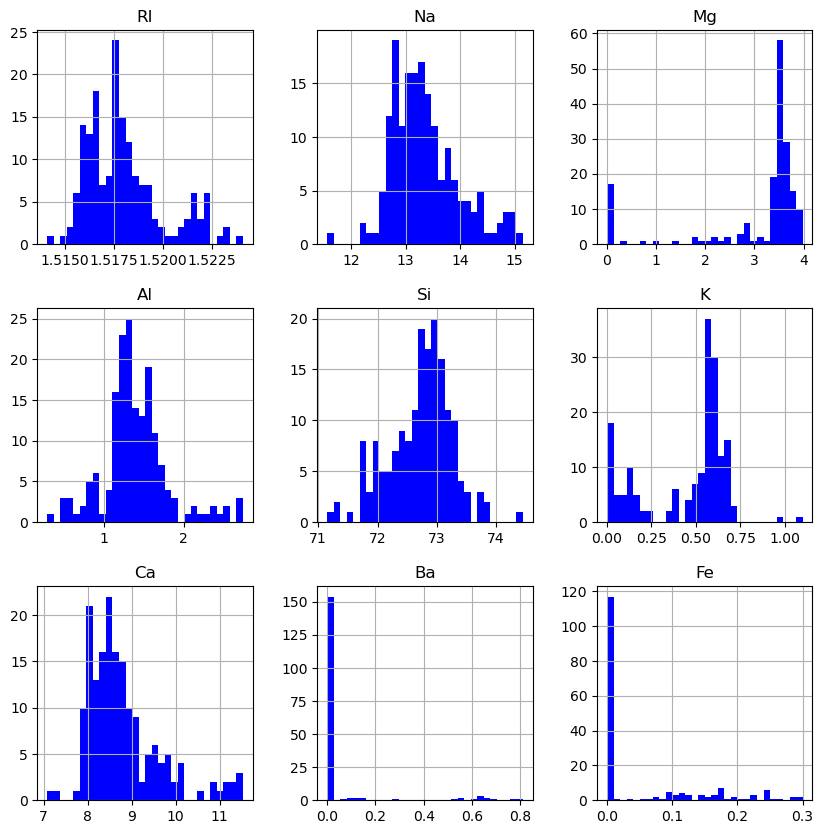

In [422]:
# display in figure using histogram as hist:

df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [254]:
#distplot:

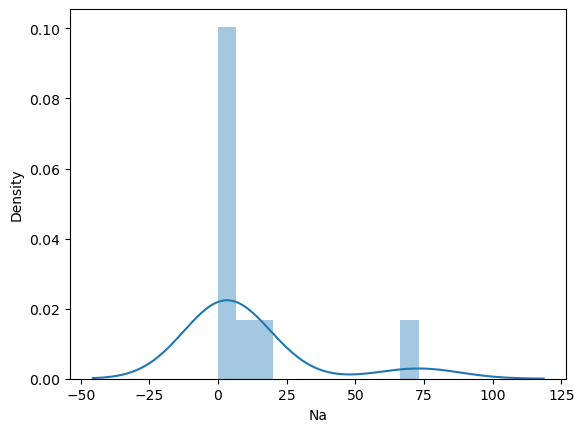

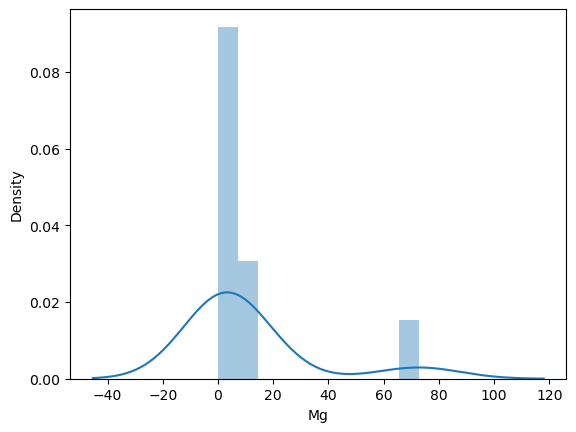

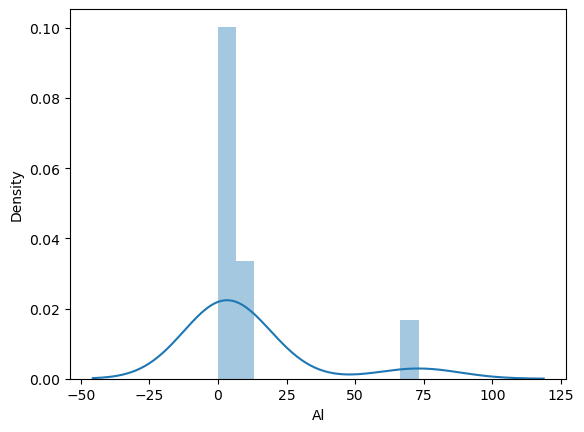

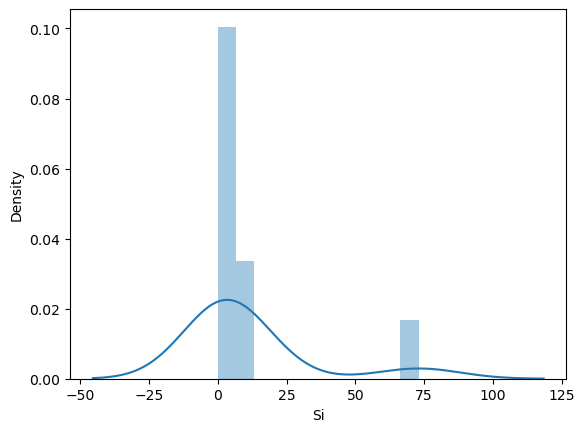

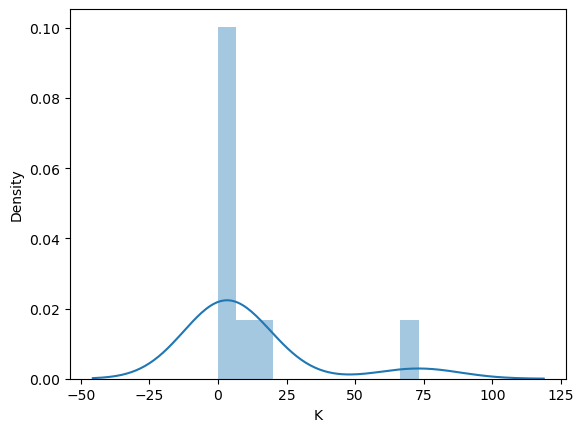

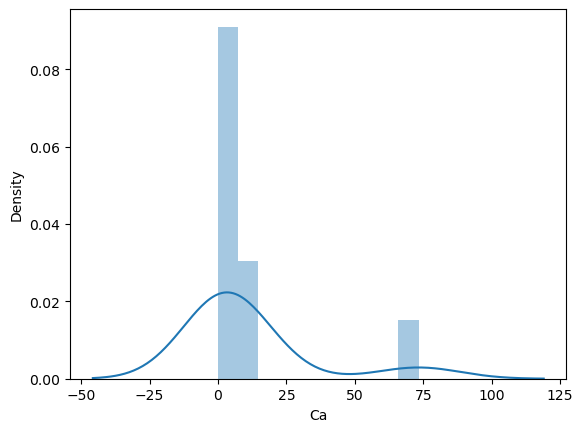

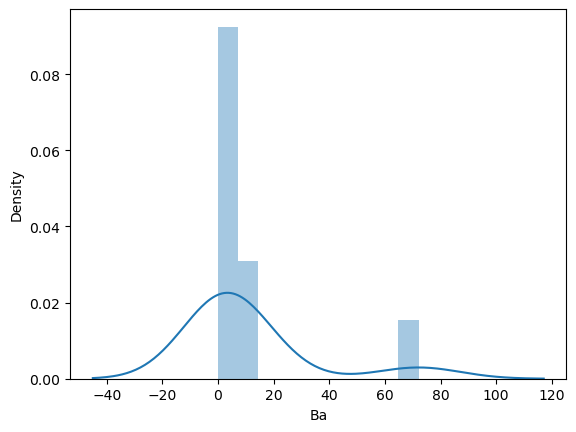

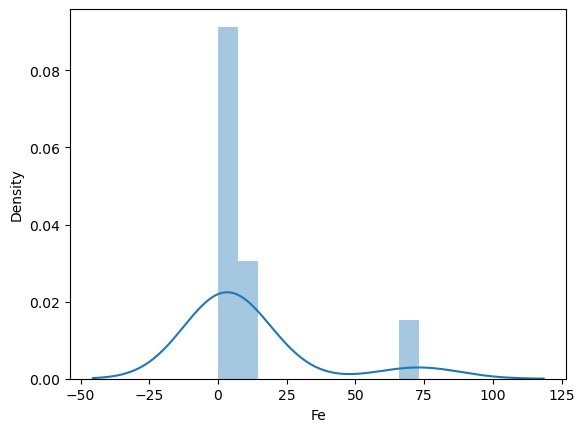

In [304]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

-Above diagrams shows that our dataset is skewed either on positive side or negative side and data is not normalized

In [256]:
#pairplot:

<Figure size 800x800 with 0 Axes>

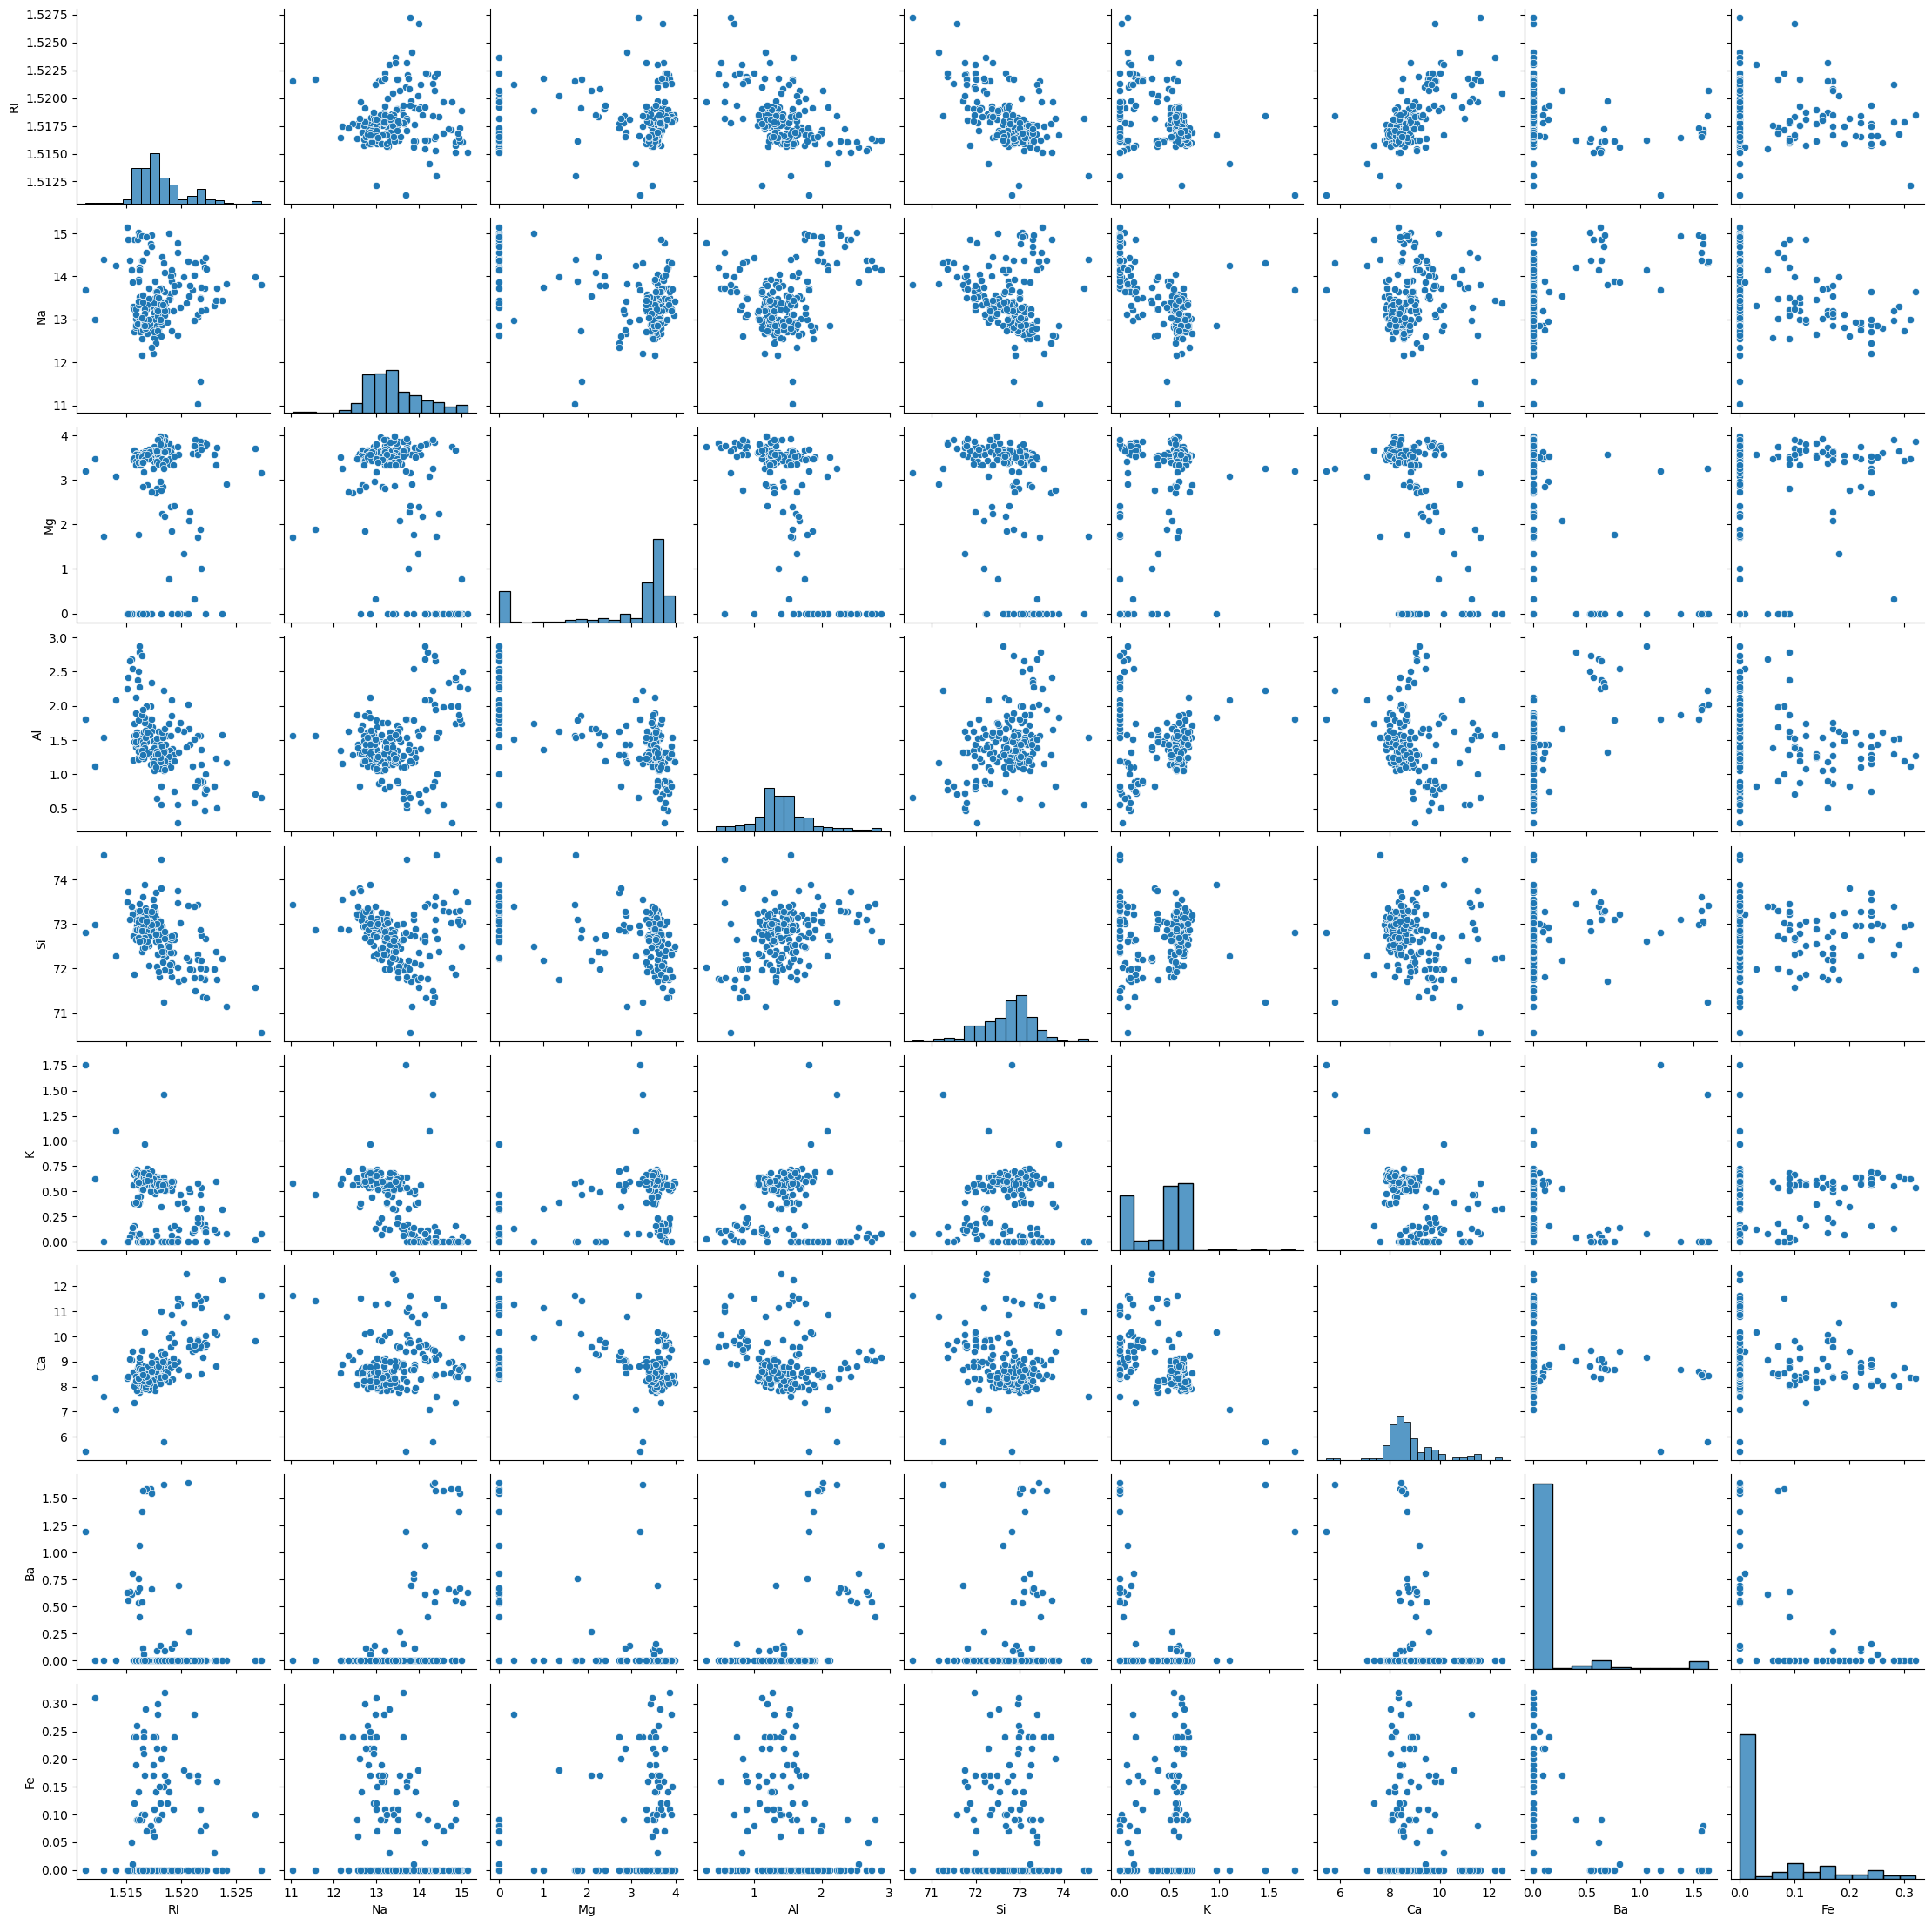

In [305]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

# Correlation:

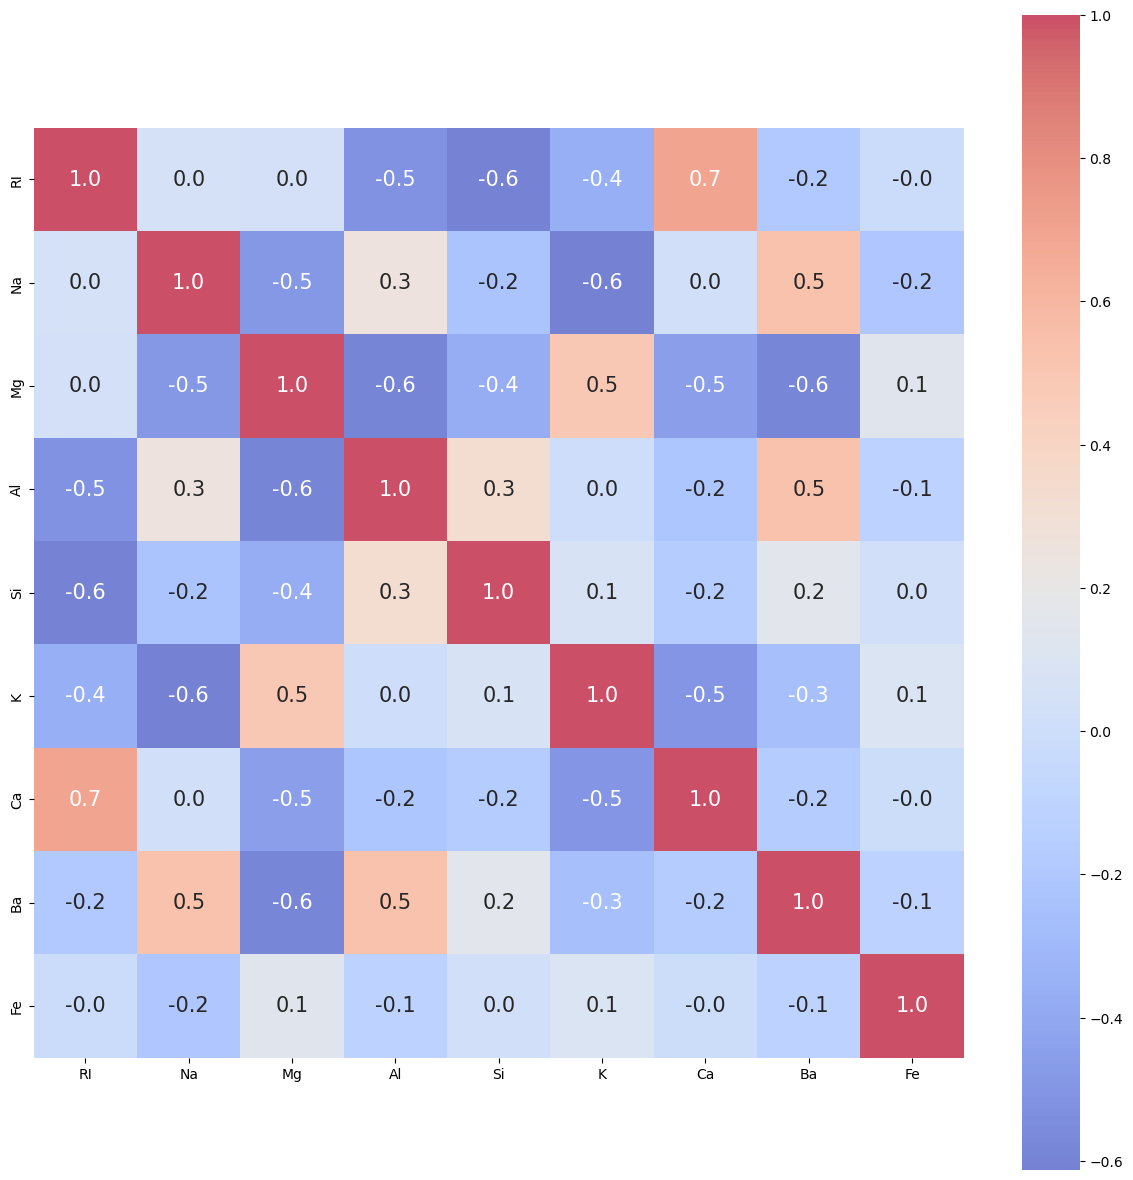

In [306]:
 #Correlation:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

-Our Diagram shows correaltion between different features Conclusion:

RI and Ca have strong correlation between each other
AI and ba have intermediate correlation between each other

# Normalizing and Scalling the data (1-0 range)

In [307]:
## normalizing/Scalling the data  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [308]:
#checking upper 2 rows:
X.head(2)

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0

In [309]:
#checking upper 2 rows:
y.head(2)

glass_type
0          1
1          1

# Scalling the features

In [317]:
from sklearn import preprocing
X=preprocessing.scale(X)                         

# Visualizing Data after Preprocessing

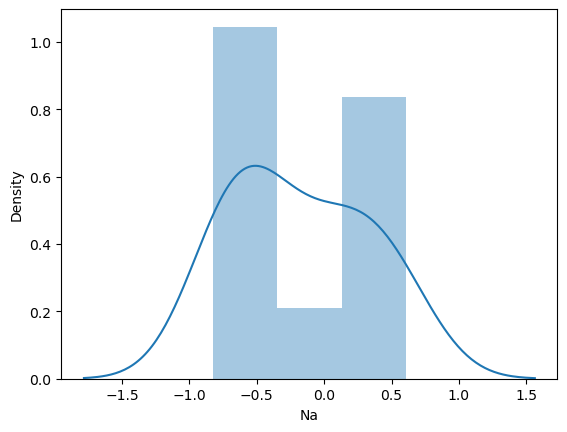

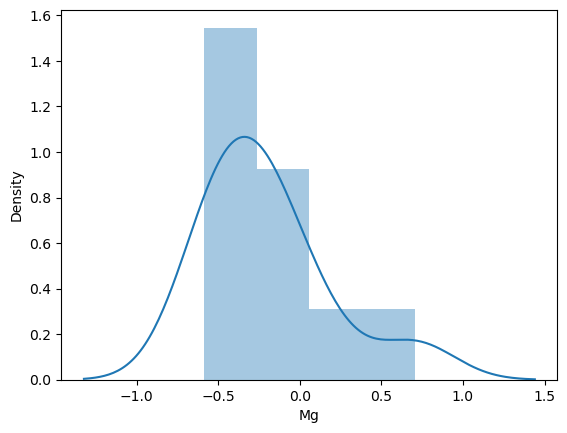

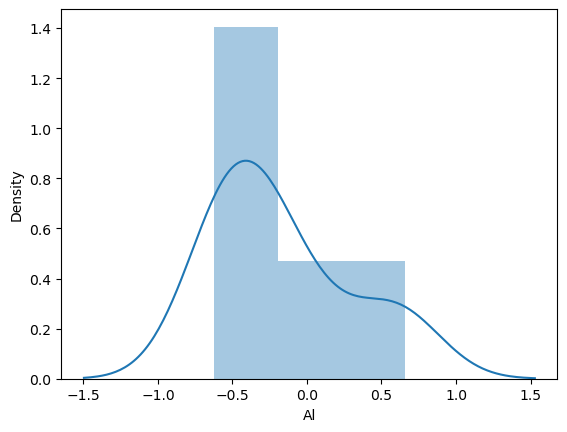

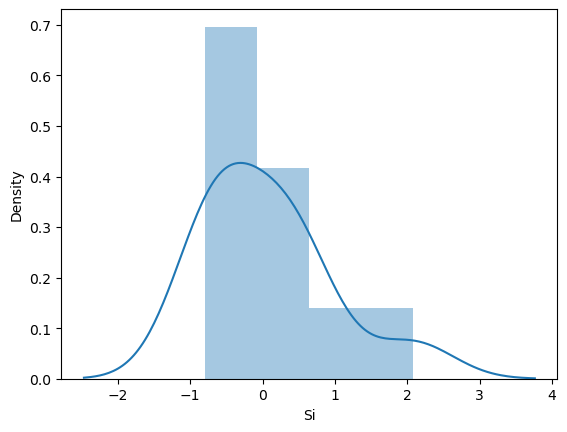

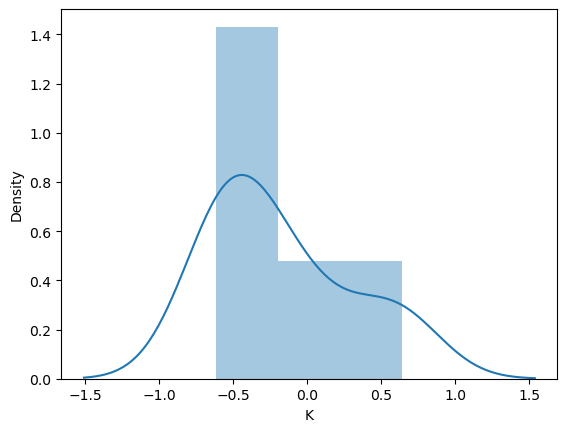

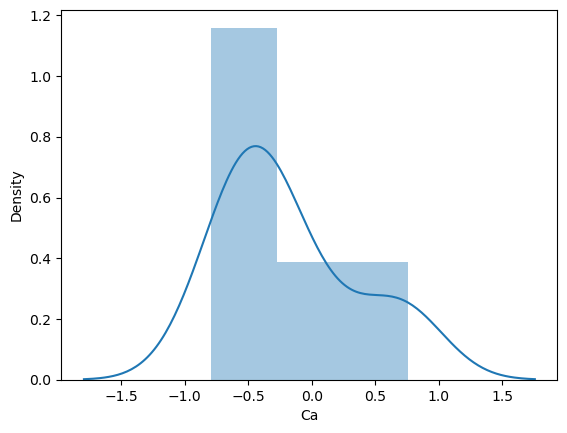

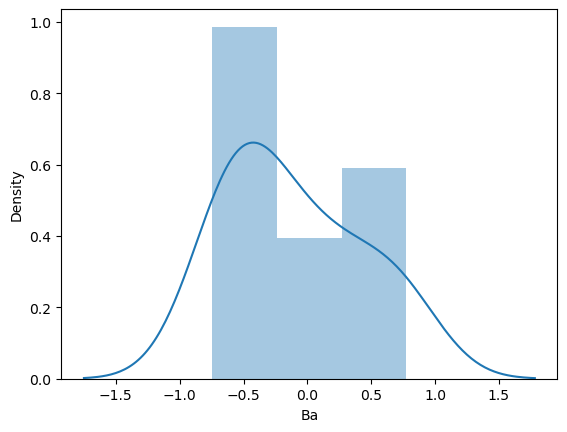

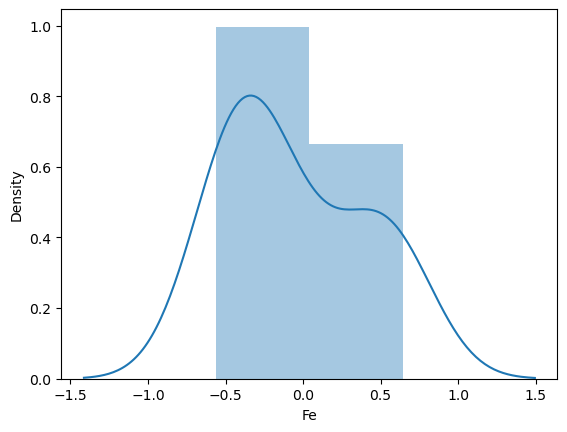

In [316]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

-Above diagrams show that after preprocessing skewness is reduced, and data is more normalized

# Models to Fit & Evaluate

In [318]:
# # # Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Balancing dataset:

In [333]:
pip install imbalanced-learn

# OverSampling:

In [367]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [339]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [340]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [341]:
# define dataset
X, y = make_classification(n_samples=213, weights=[0.193], flip_y=0)

In [342]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=213, weights=[0.193], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 171, 0: 42})
Counter({1: 171, 0: 171})


# BEST RANDOM STATE:

In [319]:
# checking testing accuracy:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
acc=accuracy_score(y_test,predlr)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.6938775510204082 random_state 8


In [320]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.6938775510204082 random_state 8


In [321]:
# checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
acc=accuracy_score(y_test,predKNN)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.7346938775510204 random_state 8


In [322]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.7346938775510204 random_state 8


In [323]:
# checking testing accuracy:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
acc=accuracy_score(y_test,preddt)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.673469387755102 random_state 8


In [324]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.673469387755102 random_state 8


In [325]:
# checking testing accuracy:
svc=SVC()
svc.fit(X_train,y_train)
predsvc=dt.predict(X_test)
acc=accuracy_score(y_test,predsvc)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.673469387755102 random_state 8


In [326]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.673469387755102 random_state 8


In [327]:
# checking testing accuracy:
from sklearn.ensemble import RandomForestClassifier
rdf=RandomForestClassifier()
rdf.fit(X_train,y_train)
predrf=rdf.predict(X_test)
acc=accuracy_score(y_test,predrf)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.8367346938775511 random_state 8


In [328]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.8367346938775511 random_state 8


# Train Test Split

In [343]:
#import train_test_split:
from sklearn.model_selection import train_test_split

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8,stratify=y)

In [349]:
#shape:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(54,)

# Applying Different Machine learning Models

In [350]:
#import lOGISTIC REGRESSION model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 90.74074074074075
Training Accuracy 90.74074074074075
[[10  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.97      0.91      0.94        43

    accuracy                           0.91        54
   macro avg       0.84      0.91      0.87        54
weighted avg       0.92      0.91      0.91        54



In [351]:
#import KNN (KNeighborsClassifier) model:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_test,predKNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN)) 

Test Accuracy 87.03703703703704
Training Accuracy 87.03703703703704
[[ 5  6]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.88      0.98      0.92        43

    accuracy                           0.87        54
   macro avg       0.85      0.72      0.76        54
weighted avg       0.87      0.87      0.85        54



In [352]:
#import DecisontreeClassifier predicting accuracy for best quality of wine:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 90.74074074074075
Training Accuracy 90.74074074074075
[[ 5  6]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.88      0.98      0.92        43

    accuracy                           0.87        54
   macro avg       0.85      0.72      0.76        54
weighted avg       0.87      0.87      0.85        54



In [353]:
#import RandomForestClassifier model:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_test,predrdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 96.29629629629629
Training Accuracy 96.29629629629629
[[10  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.98      0.98      0.98        43

    accuracy                           0.96        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.96      0.96      0.96        54



In [369]:
#import SVM model:(support vector machine)
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_test,pred_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 90.74074074074075
Training Accuracy 90.74074074074075
[[ 8  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.93      0.95      0.94        43

    accuracy                           0.91        54
   macro avg       0.87      0.84      0.85        54
weighted avg       0.90      0.91      0.91        54



# So our base model would be RandomForestClassifier .
-RandomForestClassifier seems to fare well compare all the models, 
based on f1 score & recall score cumulatively RandomForestClassifier leads the way.


# CROSS VALIDATION:

In [356]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LogisticRegression model :",cr_1.mean())

Cross Validation Score of LogisticRegression model : 0.9011074197120708


In [357]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier model :",cr_2.mean())

Cross Validation Score of KNeighborsClassifier model : 0.8823920265780731


In [358]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_3=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVM model :",cr_3.mean())

Cross Validation Score of SVM model : 0.8916943521594684


In [359]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RandomForestClassifier model :",cr_4.mean())

Cross Validation Score of RandomForestClassifier model : 0.9385382059800664


In [360]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_5=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DecisionTreeClassifier model :",cr_5.mean())

Cross Validation Score of DecisionTreeClassifier model : 0.8732004429678849


# HyperParameterTunning:

In [361]:
#Hypertunning :
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

In [362]:
#GCV=GridSearchCV
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [363]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.9629629629629629

# ROC and AUC plot:

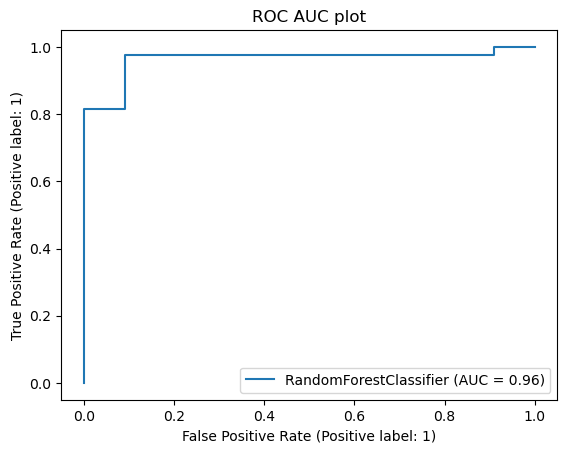

In [364]:
from sklearn.metrics import plot_roc_curve, auc 

plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show()                                 

# Pickeling of file or serialization of a file:

In [366]:
import joblib
joblib.dump(GCV.best_estimator_,"Glass_Identification.dataset.pkl")

['Glass_Identification.dataset.pkl']